# Laland et al. (1995) Gene-Culture model of human handedness (Reproduction)

In [10]:
import numpy as np
import pandas as pd
import corner
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import seaborn as sns
import scipy.optimize as opt
from scipy.special import expit, logit
import statsmodels.api as sm
from statsmodels.stats.gof import powerdiscrepancy # modified locally, use 0.14 or see https://github.com/statsmodels/statsmodels/issues/8558


# Data

## Observed data

In [11]:
""" Data as presented in Table 3 in Laland et al. (1995). The results of 17 studies of the frequency of left (L) and right (R) handed offspring born to different parental phenotypes:
 two right-handed parents (Right x Right), discordant parents (Right x Left), and two left-handed parents (Left x Left) """

#    R|RxR  L|RxR  R|RxL  L|RxL  R|LxL  L|LxL

D = [
    [841,  115,   113,   54,    1,    7],   # Ramaley (1913)
    [6917, 308,   411,   53,    18,    7],  # Chamberlain (1928)
    [1842, 151,   140,   34,    5,     6],  # Rife (1940)
    [140,  34,    33,    20,    8,     2],  # Merrell (1975)
    [6206, 669,   471,   125,   5,     1],  # Annett (1973)
    [154,  11,    31,    9,     0,     0],  # Ferronato et al. (1947)
    [232,  17,    41,    7,     3,     1],  # Mascie-Taylor (unpub, in McManus 1985)
    [1060, 144,   122,   46,    3,     4],  # Chaurasia & Groswani (unpub, in McManus 1985)
    [1656, 130,   170,   40,    4,     0],  # Annett (1978)
    [303,  37,    45,    15,    0,     0],  # Carter-Saltzmann (1980)
    [315,  68,    57,    16,    0,     0],  # Coren & Porac (1980)
    [848,  211,   325,   150,   30,   22],  # McGee & Cozad (1980)
    [58,   9,     14,    5,     0,     0],  # McManus (1985) ICM1
    [134,  15,    17,    9,     1,     0],  # McManus (1985) ICM2prop
    [74,   4,     6,     2,     0,     0],  # McManus (1985) ICM2mat
    [86,   4,     8,     1,     0,     0],  # McManus (1985) ICM2pat
    [1729, 173,   281,   63,    8,     3]   # Leiber & Axelrod (1981)
]
D = np.array(D)

In [12]:
""" Observed frequency of left handers in parents generation
     *Taken from Table 2 in McManus (1985)
     ** Calculated using the data in McManus (1985) """

mp = [
    0.0803,  # Ramaley 1913 *
    0.0356,  # Chamberlain 1928 *
    0.0524,  # Rife 1940 *
    0.1553,  # Merrell 1957 *
    0.0440,  # Annett 1973 *
    0.0986,  # Ferronato et al. 1947 *
    0.0930,  # Mascie-Taylor (unpub, in McManus 1985) *
    0.1040,  # Chaurasia & Groswani (unpub, in McManus 1985) *
    0.0547,  # Annett 1978 *
    0.0760,  # Carter-Saltzmann 1980 *
    0.0838,  # Coren & Porac 1980 *
    0.1802,  # McGee & Cozad 1980 *
    0.1105,  # McManus 1985 ICM1 **
    0.0795,  # McManus 1985 ICM2prop **
    0.0465,  # McManus 1985 ICM2mat **
    0.0455,  # McManus 1985 ICM2pat **
    0.0811 # Leiber & Axelrod 1981*
]

mp = np.array(mp)

In [13]:
""" Observed frequency of left handers in offspring generation
    *Taken from Table 2 in McManus (1985)
    ** Calculated using the data in McManus (1985) """

mo = [
    0.1556,  # Ramaley 1913 *
    0.0477,  # Chamberlain 1928 *
    0.0877,  # Rife 1940 *
    0.2362,  # Merrell 1957 *
    0.1063,  # Annett 1973 *
    0.0976,  # Ferronato et al. 1947 *
    0.0831,  # Mascie-Taylor (unpub, in McManus 1985) *
    0.1407,  # Chaurasia & Groswani (unpub, in McManus 1985) *
    0.0850,  # Annett 1978 *
    0.1320,  # Carter-Saltzmann 1980 *
    0.1838,  # Coren & Porac 1980 *
    0.2457,  # McGee & Cozad 1980 *
    0.1628,  # McManus 1985 ICM1 ** 
    0.1364,  # McManus 1985 ICM2prop ** 
    0.0698,  # McManus 1985 ICM2mat **
    0.0505,  # McManus 1985 ICM2pat **
    0.1059 # Leiber & Axelrod 1981 *
]

mo = np.array(mo)

In [14]:
Laland_index = ['Ramaley (1913)', 'Chamberlain (1928)', 'Rife (1940)', 'Merrell (1957)', 'Annett (1973)', 'Ferronato et al. (1947)', 'Mascie-Taylor (unpub)', 'Chaurasia & Goswani (unpub)',
                  'Annett (1978)', 'Carter-Saltzmann (1980)', 'Coren & Porac (1980)', 'McGee & Cozad (1980)', 'McManus (1985) (ICM1)', 'McManus (1985) (ICM2prop)', 'McManus (1985) (ICM2mat)',
                  'McManus (1985) (ICM2pat)', 'Leiber & Axelrod (1981)']

## Laland et al. (1995) findings

In [15]:
""" Laland's estimated parameters"""

# using 3 parameters
                      # ρ     # α     # β 
θ_1995_3D = np.array([0.267,  0.148,  0.012])

# using 2 parameters
                      # ρ     # α     # β 
θ_1995_2D = np.array([0.277,  0.138,  0    ])
FDL_θ_1995_2D = 0.1174

In [16]:
""" Laland's expected values"""

#    R|RxR  L|RxR     R|RxL    L|RxL   R|LxL    L|LxL
    
Laland_95_prediction = [
    [826.7,  129.3,   123.3,   43.7,    4.9,     3.1],  # Ramaley 1913
    [6906.8, 318.3,   419.8,   44.2,    21.3,    3.7],  # Chamberlain 1928
    [1838.3, 154.7,   143.8,   30.2,    8.03,    3.0],  # Rife 1940
    [137.8,  36.2,    37.2,    15.8,    6.1,     3.9],  # Merrell 1975
    [6214.0, 661.0,   469.9,   126.1,   4.0,     2.0],  # Annett 1973
    [152.6,  12.5,    32.5,    7.5,     0.0,     0.0],  # Ferronato et al. 1947
    [232.7,  16.3,    40.3,    7.7,     3.0,     1.0],  # Mascie-Taylor (unpub, in McManus 1985)
    [1067.7, 136.3,   126.8,   41.3,    4.4,     2.7],  # Chaurasia & Groswani (unpub, in McManus 1985)
    [1652.4, 133.6,   174.7,   35.3,    3.0,     1.0],  # Annett 1978
    [301.8,  38.2,    45.5,    14.5,    0.0,     0.0],  # Carter-Saltzmann 1980
    [320.5,  62.5,    52.1,    20.9,    0.0,     0.0],  # Coren & Porac 1980
    [828.1,  230.9,   334.9,   140.1,   32.7,   19.3],  # McGee & Cozad 1980
    [58.3,   8.7,     14.0,    5.0,     0.0,     0.0],  # McManus 1985 ICM1
    [131.7,  17.3,    19.6,    6.4,     0.6,     0.4],  # McManus 1985 ICM2prop
    [73.1,   4.9,     6.9,     1.1,     0.0,     0.0],  # McManus 1985 ICM2mat
    [85.9,   4.1,     8.1,     0.9,     0.0,     0.0],  # McManus 1985 ICM2pat
    [1737.5, 164.5,   273.1,   70.9,    7.4,     3.6]   # Leiber & Axelrod 1981
]

Laland_95_prediction = np.array(Laland_95_prediction)

In [17]:
"""Laland (1995) G-statistic values"""

G_1995_each = np.array([
                      13.19,  # Ramaley 1913
                      5.09,   # Chamberlain 1928
                      4.37,   # Rife 1940
                      3.33,   # Merrell 1975
                      0.90,   # Annett 1973
                      0.54,   # Ferronato et al. 1947
                      0.11,   # Mascie-Taylor (unpub, in McManus 1985)
                      2.27,   # Chaurasia & Groswani (unpub, in McManus 1985)
                      3.26,   # Annett 1978
                      0.06,   # Carter-Saltzmann 1980
                      2.25,   # Coren & Porac 1980
                      3.80,   # McGee & Cozad 1980
                      0.01,   # McManus 1985 ICM1
                      2.61,   # McManus 1985 ICM2prop
                      0.88,   # McManus 1985 ICM2mat
                      0.01,   # McManus 1985 ICM2pat
                      1.75    # Leiber & Axelrod 1981
                      ])

G_1995_overall = G_1995_each.sum().round(2)

G_1995_overall_wrong =  44.33 # Laland et al (1995) reported G_overall = 44.33 while summing G values across all studies gives G_overall = 44.43

# The Model

The final equilibrium frequency of *right handers* ($F_{DR}$) with allele D fixed is given by:

$$F_{DR} = {2\alpha + 2\beta - 1 + \sqrt{4\alpha^2 -4\alpha + 4\beta^2 + 1 + 8\alpha\beta} \over 4\beta}$$

$$F_{DL}=1-F_{DR}$$

when fixing $\beta$ to zero the equilibrium is given by:

$$F_{DR}=\frac{1-2\alpha+2\rho}{2(1-2\alpha)}$$
$$F_{DL}=\frac{1-2\alpha-2\rho}{2(1-2\alpha)}$$


In [18]:
def compute_t(ρ, α, β):
    """Generate t - the true incidence of left-handedness

    From Laland at al., (1995):
    F_DR is the final equilibrium frequency of right-handers with allele D fixed
    We need F_DL = 1 - F_DR
    """
    if np.isclose(β, 0): 
        FDR = (1 - 2 * α + 2 * ρ) / (2 * (1 - 2 * α))  # eq 3a
    else:
        Δ = 4 * α * α - 4 * α + 4 * β * β + 1 + 8 * β * ρ
        FDR = (2 * α + 2 * β - 1 + np.sqrt(Δ)) / (4 * β)  # eq 3
        assert 0 < 1 - FDR < 1, ("t is the problem! t = ", 1-FDR)
    return 1 - FDR

"Central to our model is the assumption that selection has eliminated all genetic variation contributing to handedness. Variation in handedness can, nontheless, be account for by the fact that individuals homozygous for the D allel will
be exclusivly right handed if:
$$\alpha+\rho = \frac{1}{2}$$
as required by both leading genetic models of handedness.

**If, as we assume: $$\alpha+\rho < \frac{1}{2}$$ left handers will remain in the population at a frequancy given by $F_{DL}$ in eq(3)**" (Laland et al., 1995)


In [19]:
def validate(θ):
    if len(θ) == 3: # when estimating all thre parameters (ρ, α, β) 
        ρ, α, β = θ 
    elif len(θ) == 2:   # when estimating ρ, α - fix β to zero
        ρ, α = θ
        β = 0
    else:
        raise ValueError("Length of θ is {}".format(len(θ)))

    if (not 0 <= ρ <= 1) or (not 0 <= α <= 1) or (not 0 <= β <= 1) or (ρ + α >= 0.5) or (ρ - α > 0.5) or (ρ + β > 0.5): # model constrain of parameters
        return False
    return True

The entries of the matrix T gives the expected frequencies of truly right- and left-handed offspring born to truly right- and left-handed parents:

$$ T = p(H_t|H_t x H_t) $$

$$ T =  \begin{pmatrix}
p(R_t | R_t  x R_t) & p(L_t | R_t  x R_t) \\
p(R_t | R_t  x L_t) & p(L_t | R_t  x L_t) \\
p(R_t | L_t  x L_t) & p(L_t | L_t  x L_t)
\end{pmatrix} $$

Assuming fixation of the D allele, the matrix T is given by (Table 2):

$$ T =  \begin{pmatrix}
1/2 + \rho + \alpha & 1-(1/2 + \rho + \alpha) \\
1/2 + \rho + \beta & 1 - (1/2 + \rho + \beta) \\
1/2 + \rho - \alpha & 1 - (1/2 + \rho - \alpha)
\end{pmatrix} $$

In [20]:
def compute_T(ρ, α, β):
    """Generate T - column DD in Table 1

    From Appendix 3:
    T is a 3 x 2 matrix of p(Ht | Ht x Ht) entries -
    probability of a truly H child from a mating where parents are truly H
    """
    return np.array([
        # R           L
        [0.5 + ρ + α, 1 - (0.5 + ρ + α)],  # RxR
        [0.5 + ρ + β, 1 - (0.5 + ρ + β)],  # RxL
        [0.5 + ρ - α, 1 - (0.5 + ρ - α)]  # LxL
    ])

# Adjusting for criterion shift

**criterion shift**: when the measures incidence of left handers in a particular study deviates from the true one due to methodological artifact. 

**Adjusting**: the goal is to transform matrix T of into matrix M which gives the probability that an offspring measured as right- or left-handed is born to parents measured as right-handed, left-handed, and mixed-handed.

$$ M =  \begin{pmatrix}
p(R_m | R_m  x R_m) & p(L_m | R_m  x R_m) \\
p(R_m | R_m  x L_m) & p(L_m | R_m  x L_m) \\
p(R_m | L_m  x L_m) & p(L_m | L_m  x L_m)
\end{pmatrix} $$


To transform T to M - P and O are transition matrices that operate on parents and offsprings generation separately. It is assumed that:

$$ M = PTO $$


In [21]:
def compute_P(mp, t):

    """ Parents generation:
    The matrix P gives the probability that a mating measured as RxR, RxL, or LxL is truly RxR, RxL, or LxL"""

    if mp > t:                  # Some true right handers were measured as left handers
        u = (mp - t) / mp       # The proportion of individuals measured as left handers that are truly right handers
        assert 0 <= u < 1, "u is the problem"
        # The matrix P is given by:
        P = np.array([  
            [1, 0, 0],
            [u, 1 - u, 0],
            [u * u, 2 * u * (1 - u), (1 - u) * (1 - u)]
        ])

    if mp < t:                   # Some true left handers were measured as right handers
        v = (t - mp) / (1 - mp)  # The proportion of individuals measured as right handed who are truly left handed
        assert 0 <= v <= 1, "v is the problem"
        # The matrix P is given by:
        P = np.array([
            [(1 - v) * (1 - v), 2 * v * (1 - v), v * v],
            [0, 1 - v, v],
            [0, 0, 1]
        ])

    if mp == t:                 # Everyone were measured as what they truly are
        # The matrix P is given by:
        P = np.array([
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
            ])
        assert ((0 <= P) & (P <= 1)).all(), "P is the problem"
        
    return P

In [22]:

def compute_O(mo, t):

    """ Offspring generation:
    The matrix O gives the probability of offspring measured as right or left handed given that it is truly right or left handed """
    
    if mo > t:                  # Some true right handers were measured as left handers
        w = (mo - t) / (1 - t)  # The proportion of individuals measured as left handers that are truly right handers
        assert 0 <= w < 1, "w is the problem"
        # The matrix O is given by:
        O = np.array([
            [1 - w, w],
            [0, 1]
        ])
        
    if mo < t:                  # Some true left handers were measured as right handers
        x = 1 - (mo / t)        # The proportion of individuals measured as right handed who are truly left handed
        assert 0 <= x <= 1, "x is the problem"
        # The matrix O is given by:
        O = np.array([
            [1, 0],
            [x, 1 - x]
        ])

    if mo == t:                 # Everyone were measured as what they truly are
        # The matrix O is given by:
        O = np.array([
            [1, 0],
            [0, 1]
            ])
        assert ((0 <= O) & (O <= 1)).all(), "O is the problem"

    return O

In [23]:
def compute_M(T, P, O):
    M = P @ T @ O
    assert ((0 <= M) & (M <= 1)).all(), "M is the problem"
    return M

# log-Likelihood functions

The likelihood function of the model’s parameters given an observed dataset (D) is the product of the binomial probabilities of right- or left-handed children born to the three parental mating classes.

 When adjusting for criterion shift, the log-likelihood function (as appeares in Laland et al. (1995)) is given by:
 $$S_{M}(\theta|D) = N_{R|RXR} In[p(R_m|R_mxR_m)] + N_{L|RXR} In[p(L_m|R_mxR_m)] + N_{R|RXL} In[p(R_m|R_mxL_m)] + \\ N_{L|RXL} In[p(L_m|R_mxL_m)]+ N_{R|LXL} In[p(R_m|L_mxL_m)] + N_{L|LXL} In[p(L_m|L_mxL_m)]$$

In [24]:

""" 
When adjusting for criterion shift, the log-likelihood function is given by:
"""

def log_likelihood_Sm(θ, Data):  # using the function Sm

    # Check the length of θ to unpack the parameters accordingly
    if len(θ) == 3:
        ρ, α, β = θ
    elif len(θ) == 2:
        ρ, α = θ
        β = 0  # Default value for β if not provided
    else:
        raise ValueError("Length of θ is {}".format(len(θ)))  # Raise error if length of θ is not 2 or 3

    # Validate the parameters θ
    if not validate(θ):
        return -np.inf  # Return negative infinity if θ is not valid

    Sm = 0  # Initialize log-likelihood sum

    # Compute T and t using the provided functions and parameters
    T = compute_T(ρ, α, β)
    t = compute_t(ρ, α, β)
    
    # Ensure T and t are within valid ranges
    assert ((0 <= T) & (T <= 1)).all(), "T is the problem"
    assert 0 <= t <= 1, "t is the problem"

    #Estimation using the matrix M:
    
    # Loop through each dataset in Data
    for index, dataset in enumerate(Data):
        # Retrieve mp and mo indices for the current dataset
        mp_idx = mp[index]
        mo_idx = mo[index]
        
        # Ensure mp and mo indices are within valid ranges
        assert 0 < mp_idx < 1, "mp is not right"
        assert 0 < mo_idx < 1, "mo is not right"

        # Compute P and O using the provided functions and mp, mo indices
        P = compute_P(mp_idx, t)
        assert ((0 <= P) & (P <= 1)).all(), "P is the problem"
        
        O = compute_O(mo_idx, t)
        assert ((0 <= O) & (O <= 1)).all(), "O is the problem"
        
        # Compute matrix M using T, P, and O
        M = compute_M(T, P, O)
        assert ((0 <= M) & (M <= 1)).all(), "M is the problem"

        # Compute the log of M
        logM = np.log(M)

        # Sum up the log-likelihood for the current dataset
        Sm += (
            dataset[0] * logM[0, 0] +  # R|RxR
            dataset[1] * logM[0, 1] +  # L|RxR
            dataset[2] * logM[1, 0] +  # R|RxL
            dataset[3] * logM[1, 1] +  # L|RxL
            dataset[4] * logM[2, 0] +  # R|LxL
            dataset[5] * logM[2, 1]    # L|LxL
        )

    return Sm  # Return the computed log-likelihood sum 


 Without adjusting for criterion shift, the log-likelihood function is given by:
  $$S_{T}(\theta|D) = N_{R|RXR} In[p(R_t|R_txR_t)] + N_{L|RXR} In[p(L_t|R_txR_t)] + N_{R|RXL} In[p(R_t|R_txL_t)] + \\ N_{L|RXL} In[p(L_t|R_txL_t)]+ N_{R|LXL} In[p(R_t|L_txL_t)] + N_{L|LXL} In[p(L_t|L_txL_t)]$$

In [25]:

"""
Without adjusting for criterion shift, the log-likelihood function is given by:
"""

def log_likelihood_St(θ, Data):  # using the function St

    # Check the length of θ to unpack the parameters accordingly
    if len(θ) == 3:
        ρ, α, β = θ
    elif len(θ) == 2:
        ρ, α = θ
        β = 0  # Default value for β if not provided
    else:
        raise ValueError("Length of θ is {}".format(len(θ)))  # Raise error if length of θ is not 2 or 3

    # Validate the parameters θ
    if not validate(θ):
        return -np.inf  # Return negative infinity if θ is not valid

    St = 0  # Initialize log-likelihood sum

    # Compute T and t using the provided functions and parameters
    T = compute_T(ρ, α, β)
    t = compute_t(ρ, α, β)
    
    # Ensure T and t are within valid ranges
    assert ((0 <= T) & (T <= 1)).all(), "T is the problem"
    assert 0 <= t <= 1, "t is the problem"

    #Estimation using the matrix T:

    # Loop through each dataset in Data
    for dataset in Data:
        # Compute the log of T
        logT = np.log(T)

        # Sum up the log-likelihood for the current dataset
        St += (
            dataset[0] * logT[0, 0] +  # R|RxR
            dataset[1] * logT[0, 1] +  # L|RxR
            dataset[2] * logT[1, 0] +  # R|RxL
            dataset[3] * logT[1, 1] +  # L|RxL
            dataset[4] * logT[2, 0] +  # R|LxL
            dataset[5] * logT[2, 1]    # L|LxL
        )

    return St  # Return the computed log-likelihood sum


# Statistical inference

## Maximum Likelihood Estimation

In [26]:
# Define a function negating the result of the log-likelihood functions

# Negate the result of log_likelihood_Sm (with adjustments)
def neg_log_likelihood_Sm(θ, Data):
    """
    Compute the negative log-likelihood for the adjusted model.

    Parameters:
    θ (array-like): Model parameters.
    Data (list or numpy.ndarray): The dataset to evaluate the log-likelihood.

    Returns:
    float: The negative log-likelihood value.
    """
    return -log_likelihood_Sm(θ, Data)

# Negate the result of log_likelihood_St (without adjustments)
def neg_log_likelihood_St(θ, Data):
    """
    Compute the negative log-likelihood for the unadjusted model.

    Parameters:
    θ (array-like): Model parameters.
    Data (list or numpy.ndarray): The dataset to evaluate the log-likelihood.

    Returns:
    float: The negative log-likelihood value.
    """
    return -log_likelihood_St(θ, Data)


In [27]:
def fit(n_parameters, data, adjust):
    """
    Fit the model parameters to the given data.

    Parameters:
    n_parameters (int): The number of parameters to estimate.
    data (list or numpy.ndarray): The dataset to fit the model to.
    adjust (bool): If True, use the Sm function; if False, use the St function.

    Returns:
    tuple: Estimated parameters (θ_hat) and the maximum log-likelihood (logL).
    """
    
    # Initialize variables
    θ_hat = None  # Store the estimated parameters
    logL = -np.inf  # Initialize log-likelihood as negative infinity

    # Iterate for 1000 times
    for _ in range(1000):
        # Generate random initial parameter values
        θ0 = np.random.random(n_parameters) / n_parameters

        # Choose which negative log-likelihood function to minimize based on the adjust parameter
        if adjust:
            # Minimize negative log-likelihood using the Sm function
            result = opt.minimize(neg_log_likelihood_Sm, θ0, args=(data,), method='Nelder-Mead')
        else:
            # Minimize negative log-likelihood using the St function
            result = opt.minimize(neg_log_likelihood_St, θ0, args=(data,), method='Nelder-Mead')
            
        # Update parameters if the new log-likelihood is higher than the current one
        if -result.fun > logL:
            logL = -result.fun  # Update the log-likelihood
            θ_hat = result.x  # Update the estimated parameters
            print(θ_hat, logL, flush=True)  # Print the updated parameters and log-likelihood
    
    # Return the estimated parameters and the maximum log-likelihood found
    return θ_hat, logL


## G-test for goodness-of-fit

To test if the model’s predictions provide a good fit for the observed data, a goodness-of-fit test was conducted by computing a G-statistic for each individual study in the dataset (Di) and across all studies combined.

In [28]:
def expected_table(θ, Observed, adjust):
    """
    Generates an expected table for the data using estimated parameters.

    Parameters:
    - θ: Parameter values
    - Observed: Observed data
    - adjust: If True, adjustments for criterion shift will be implemented

    Returns:
    - exp_table: Expected table
    """

    exp_table = np.array([])  # Initialize an empty array for the expected table

    # Unpack parameters 
    if len(θ) == 3:
        ρ, α, β = θ
    elif len(θ) == 2:
        ρ, α = θ
        β = 0
    
    # Compute t and T using the compute_t and compute_T functions
    t = compute_t(*θ)
    T = compute_T(*θ)
    
    # Implement adjustments for criterion shift if adjust is True and use matrix M for expected table
    if adjust == True:  
        for index, dataset in enumerate(Observed):
            mp_idx = mp[index]
            mo_idx = mo[index]
            
            # Check if mp and mo are within the valid range
            assert 0 < mp_idx < 1, "mp is not right"
            assert 0 < mo_idx < 1, "mo is not right"

            # Compute P and O using mp, mo, and t
            P = compute_P(mp_idx, t)
            assert ((0 <= P) & (P <= 1)).all()
            O = compute_O(mo_idx, t)
            assert ((0 <= O) & (O <= 1)).all()

            # Compute M using T, P, and O
            M = compute_M(T, P, O)
            assert ((0 <= M) & (M <= 1)).all()

            Obs = dataset.copy()
            Exp = M.reshape(6).copy()

            # Scale expected frequencies by the observed frequencies sum
            Exp[:2] *= Obs[:2].sum()
            Exp[2:4] *= Obs[2:4].sum()
            Exp[4:] *= Obs[4:].sum()
            
            # Avoid division by zero
            Exp[Exp == 0] = 1e-16

            # Append the computed expected frequencies to the expected table
            exp_table = np.append(exp_table, Exp)
    
    # If adjust is False, don't implement adjustments for criterion shift and use matrix T for expected table
    if adjust == False:
        for dataset in Observed:
            Obs = dataset.copy()
            Exp = T.reshape(6).copy()

            # Scale expected frequencies by the observed frequencies sum
            Exp[:2] *= Obs[:2].sum()
            Exp[2:4] *= Obs[2:4].sum()
            Exp[4:] *= Obs[4:].sum()
            
            # Avoid division by zero
            Exp[Exp == 0] = 1e-16

            # Append the computed expected frequencies to the expected table
            exp_table = np.append(exp_table, Exp)

    return exp_table


In [29]:
def G_test(Observed, Expected, df):
    """
    G-test for goodness-of-fit formula.

    Parameters:
    - Observed: Array of observed data
    - Expected: Array of expected data (generated by 'expected_table' function)
    - df: Degrees of freedom

    Returns:
    - G: G-test statistic
    - p_value: p-value
    """
    
    # Compute sums of observed and expected frequencies
    Data_sum = Observed.sum()
    Expected_sum = round(Expected.sum(), 0)
    
    # Ensure that observed and expected sums are equal
    assert (Data_sum == Expected_sum), ("Observed and expected sums are not equal")

    G = 0  # Initialize G-test statistic

    # Calculate G-test statistic
    for i in range(0, len(Observed)):
        if Observed[i] > 0:  # Calculate only if observed frequency is greater than 0
            G += Observed[i] * np.log(Observed[i] / Expected[i])

    # Multiply G by 2 to match the chi-squared distribution with df degrees of freedom
    G = 2 * G  

    # Compute p-value using chi-squared survival function
    p_value = scipy.stats.chi2.sf(G, df)

    # Round G to 2 decimal places
    G = G.round(2)

    # Print G-test statistic and p-value with asterisk (*) if p-value < 0.05
    if p_value < 0.05:
        print("G= {:.3}*,\tp_value= {:.3f}".format(G, p_value))
    else:
        print("G= {:.3},\tp_value= {:.3f}".format(G, p_value))

    return G, p_value


In [30]:

def Goodness_of_fit(θ, Observed, adjust):
    """
    Perform the G-test for goodness-of-fit on each study (row) in the dataset and on all studies combined.

    Parameters:
    - θ: Parameters value
    - Observed: Observed data
    - adjust: If True, adjustments for criterion shift will be implemented

    Returns:
    - G_all: G-test statistic for all studies combined
    - p_all: p-value for all studies combined
    # - Delta_overall: Difference between G-test statistic of Laland et al. (1995) and the combined G-test statistic 
    - G_each: Array of G-test statistics for each study
    - p_each: Array of p-values for each study
    # - Delta_each: Array of differences between G-test statistics of Laland et al. (1995) and G-test statistics for each study
    """

    # Determine degrees of freedom for overall and each study
    if (len(θ) == 3 and θ[2] == 0) or (len(θ) == 2):  # if beta was fixed at zero
        df_overall = 32  # df_overall = 34-2
        df_each = 1.88  # df_each = (34-2)/17
    else:                                             # if beta not fixed at zero
        df_overall = 31  # df_overall = 34-3
        df_each = 1.82  # df_each = (34-3)/17
    
    # Print information about parameters and degrees of freedom used
    print('G-test for ρ={:.3f}, α={:.3f}, β={:.3f}'.format(*θ))
    print('df overall = ', df_overall, ' df each = ', df_each , '\n')
    print("-" * 30)

    # G-test for all studies combined
    print("Overall:\n")
    Exp_all = expected_table(θ, Observed, adjust) 
    Obs_all = Observed.reshape(Exp_all.shape)
    G_all, p_all = G_test(Obs_all,  Exp_all, df=df_overall)
    Delta_overall = (G_1995_overall - G_all.round(2)).round(3)

    print("-" * 30)

    # G-test for each study
    print("Each row in dataset:\n")
    Exp_each = Exp_all.reshape(Observed.shape)
    Obs_each = Observed.copy()
    G_each = np.array([])
    p_each = np.array([])
    Delta_each = np.array([])

    for i in range(0, len(Observed)):
        # Perform G-test for each study
        G_idx, pvalue_idx = G_test(Obs_each[i], Exp_each[i], df=df_each)
        G_each = np.append(G_each, G_idx)
        p_each = np.append(p_each, pvalue_idx)
        Delta_each = np.append(Delta_each, (G_1995_each[i] - G_idx.round(2))).round(3)
    
    print("-" * 30)
    
    return G_all, p_all, Delta_overall, G_each, p_each, Delta_each


In [31]:
def results_table(θ, Observed, G_each, adjust, delta):
    """
    Generate a table of differences between expected and observed data.

    Parameters:
    - θ: Parameters value used for prediction.
    - Observed: Array of observed data.
    - G_each: Array of G-test statistics for each study.
    - adjust: If True, adjustments for criterion shift will be implemented.
    - delta: If True, return a table where each cell is the difference between observed and expected values. If False, return a table where each cell is the observed value followed by the predicted value.

    Returns:
    - df: DataFrame containing the results table.
    """
    
    # Generate expected values based on parameters θ
    prediction = expected_table(θ, Observed, adjust).round(1) 
    
    # Reshape observed data to match the shape of the prediction array
    observed = Observed.reshape(prediction.shape)
    
    if delta == True:   
        # Return a table where each cell is: observed-expected 

        # Initialize an empty array for differences (deltas)
        deltas = np.array([]) 
        # Calculate the difference between observed and expected values for each cell
        for index, observed_value in enumerate(observed):
            deltas_idx = (observed_value - prediction[index])
            deltas = np.append(arr = deltas, values= deltas_idx)
        # Reshape deltas into a table format
        deltas = deltas.reshape(17,6)
        # Create a DataFrame with the differences, using appropriate indexing and column names
        df = pd.DataFrame(data = deltas,
                          index = Laland_index,
                          columns=pd.MultiIndex.from_product([['RxR','RxL','LxL',], ['R', 'L']]))
        # Add a column for G-test statistics
        df['G'] = G_each.round(2)

    if delta == False:
        # Return a table where each cell is: 'observed value (expected value)'

        # Initialize an empty array for expected-observed (obs_exp)
        obs_exp = np.array([])
        # Create strings for each cell, containing observed value followed by predicted value
        for index, observed_value in enumerate(observed):
            observed_idx = '{}'.format(observed_value)
            predicted_idx = '({:.1f})'.format(prediction[index])
            cell = observed_idx+' '+predicted_idx
            obs_exp = np.append(obs_exp, cell)
        # Reshape the strings array into a table format
        obs_exp = obs_exp.reshape(17,6)
        # Create a DataFrame with the strings, using appropriate indexing and column names
        df = pd.DataFrame(data = obs_exp,
                          index = Laland_index,
                          columns = pd.MultiIndex.from_product([['RxR','RxL','LxL',], ['R', 'L']]))
        # Add a column for G-test statistics
        df['G'] = G_each.round(2)

    return df


# My analysis

In [32]:
""" define plots variables """

font_size_= 15
tick_size_ = 15
marker_size_ = 9
cont_color= 'magma'
line_color = 'gray'
trans = 0.2

## Descriptive

In [33]:

# pd.DataFrame of frequncy of left handers by generation (mp, mo)
Feq_L_by_gen = pd.DataFrame(data = np.column_stack((mp, mo)),
                            index = Laland_index,
                            columns = pd.MultiIndex.from_product([['% of left handers by generation'], ['Parents', 'Offspring']]))

Feq_L_by_gen = Feq_L_by_gen*100

#pd.DataFrame of Laland's data
Laland_data = pd.DataFrame(data = D,
                          index = Laland_index,
                          columns=pd.MultiIndex.from_product([['Right x Right', 'Right x Left', 'Left x Left'], ['Right', 'Left']]))

# Merge the DataFrames on the index
merged_df = Laland_data.merge(Feq_L_by_gen, left_index=True, right_index=True)

print("Data presented in Laland et al. (1995)")
merged_df

Data presented in Laland et al. (1995)


Right x Right      Right x Left      Left x Left  \
                                    Right Left        Right Left       Right   
Ramaley (1913)                        841  115          113   54           1   
Chamberlain (1928)                   6917  308          411   53          18   
Rife (1940)                          1842  151          140   34           5   
Merrell (1957)                        140   34           33   20           8   
Annett (1973)                        6206  669          471  125           5   
Ferronato et al. (1947)               154   11           31    9           0   
Mascie-Taylor (unpub)                 232   17           41    7           3   
Chaurasia & Goswani (unpub)          1060  144          122   46           3   
Annett (1978)                        1656  130          170   40           4   
Carter-Saltzmann (1980)               303   37           45   15           0   
Coren & Porac (1980)                  315   68           57   16           0   
McGee & Cozad (1980)                  848  211          325  150          30   
McManus (1985) (ICM1)                  58    9           14    5           0   
McManus (1985) (ICM2prop)             134   15           17    9           1   
McManus (1985) (ICM2mat)               74    4            6    2           0   
McManus (1985) (ICM2pat)               86    4            8    1           0   
Leiber & Axelrod (1981)              1729  173          281   63           8   

                                 % of left handers by generation            
                            Left                         Parents Offspring  
Ramaley (1913)                 7                            8.03     15.56  
Chamberlain (1928)             7                            3.56      4.77  
Rife (1940)                    6                            5.24      8.77  
Merrell (1957)                 2                           15.53     23.62  
Annett (1973)                  1                            4.40     10.63  
Ferronato et al. (1947)        0                            9.86      9.76  
Mascie-Taylor (unpub)          1                            9.30      8.31  
Chaurasia & Goswani (unpub)    4                           10.40     14.07  
Annett (1978)                  0                            5.47      8.50  
Carter-Saltzmann (1980)        0                            7.60     13.20  
Coren & Porac (1980)           0                            8.38     18.38  
McGee & Cozad (1980)          22                           18.02     24.57  
McManus (1985) (ICM1)          0                           11.05     16.28  
McManus (1985) (ICM2prop)      0                            7.95     13.64  
McManus (1985) (ICM2mat)       0                            4.65      6.98  
McManus (1985) (ICM2pat)       0                            4.55      5.05  
Leiber & Axelrod (1981)        3                            8.11     10.59

In [34]:
# pd.DataFrame of number of left and right handers by parental mating
offspring_given_parents_N = D.sum(axis=0)   
offspring_given_parents_N = offspring_given_parents_N.reshape(3,2)

offspring_given_parents_N = pd.DataFrame(data = offspring_given_parents_N,
                 index = ['Right x Right', 'Right x Left', 'Left x Left'],
                 columns = ['% Right', '% Left'])

# Calculate row sums
row_sums = offspring_given_parents_N.sum(axis=1)

# Divide each element by its corresponding row sum
offspring_given_parents_freq = offspring_given_parents_N.div(row_sums, axis=0)

# pd.DataFrame of frequncy of left and right handers by parental mating
offspring_given_parents_freq = offspring_given_parents_freq.round(3)*100

print("Table 4. Overall observed frequency of right- and left-handed offspring born to two right-handed, mixed-handed, or two left-handed parents in the 17 studies.")
offspring_given_parents_freq



Table 4. Overall observed frequency of right- and left-handed offspring born to two right-handed, mixed-handed, or two left-handed parents in the 17 studies.


,% Right,% Left
Right x Right,91.5,8.5
Right x Left,77.9,22.1
Left x Left,61.9,38.1


Figure 2. Frequency of left-handers reported by Laland et al. (1995)
(a) The frequency of left-handers in the 17 studies by generation. (b) Frequency of left- and right-handers by parental mating.


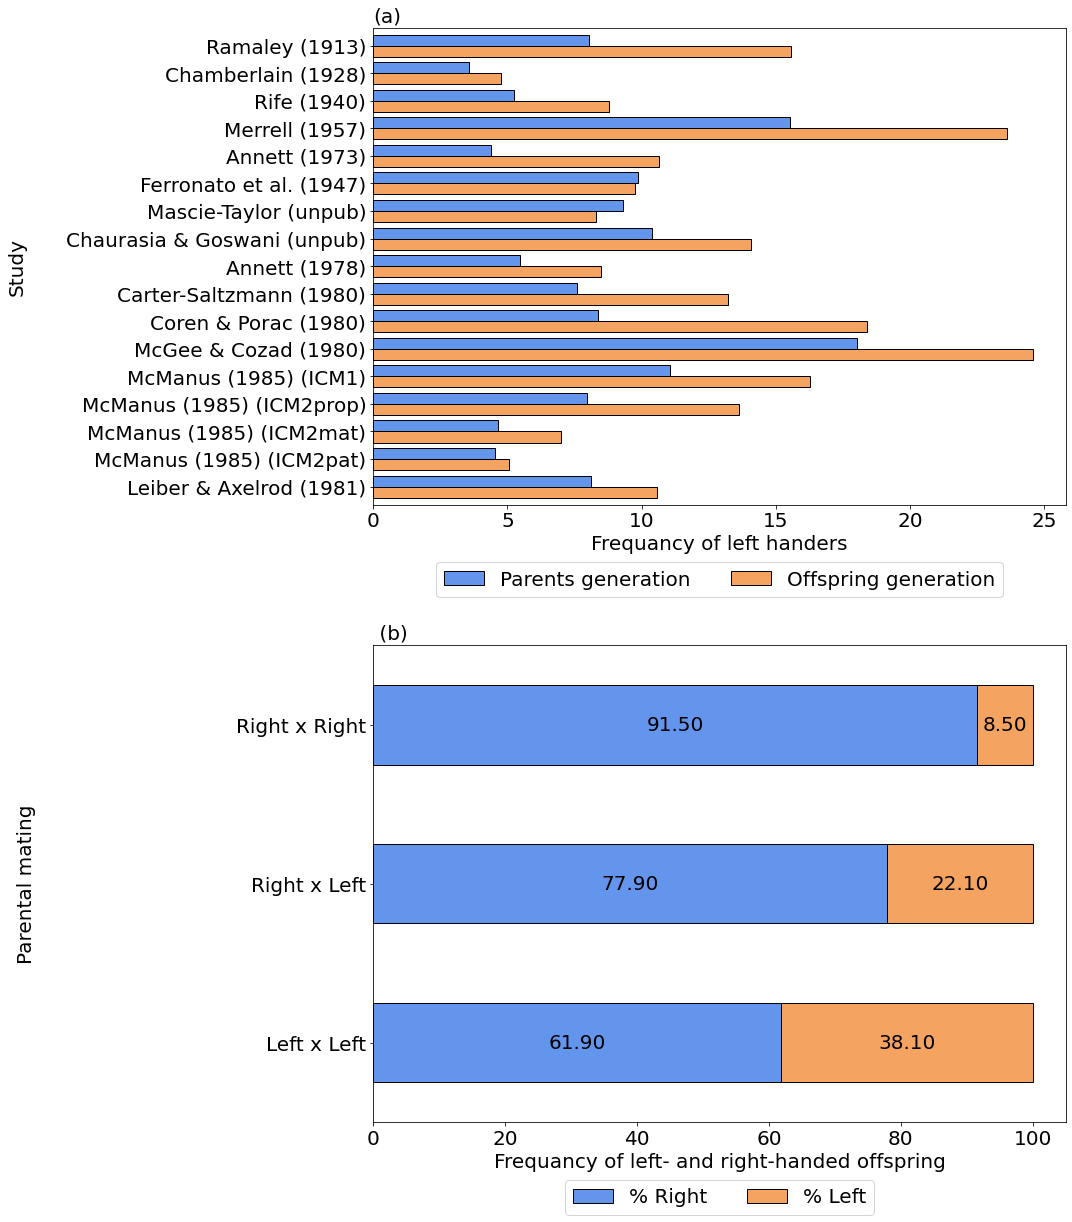

In [35]:
## plot frequency of left-handers reported by Laland et al. (1995)

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (15, 17))

fonts = font_size_ + 5

# (a) The frequency of left-handers in the 17 studies by generation
ax=axes[0]
barh = Feq_L_by_gen.plot.barh(ax = ax,
                            color=['cornflowerblue', 'sandybrown'],
                            layout='constrained',
                            width= 0.8,
                            edgecolor = 'black').invert_yaxis()

# ax.legend(['Parents generation', 'Offspring generation'], fontsize = 12, frameon = False)
ax.set_title('(a)',loc='left', size = fonts)
ax.set_ylabel("Study", fontsize= fonts)
ax.yaxis.labelpad = 40
ax.set_xlabel("Frequancy of left handers", fontsize = fonts)
ax.tick_params(axis= 'both', which = 'major', labelsize= fonts)
ax.legend(['Parents generation', 'Offspring generation'], loc='upper center',bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize = fonts)

# (b) Frequency of left- and right-handers by parental mating
ax=axes[1]
barh = offspring_given_parents_freq.plot.barh(ax = ax,
                                        color=['cornflowerblue', 'sandybrown'],
                                        layout='constrained',
                                        width= 0.5,
                                        edgecolor = 'black',
                                        stacked = True).invert_yaxis()

# ax.legend(['% Right', '% Left'], loc = 'upper right', fontsize = 11, frameon = False)
ax.set_title('\n (b)',loc='left', size = fonts)
ax.set_ylabel('Parental mating', fontsize = fonts)
ax.yaxis.labelpad = 200
ax.set_xlabel("Frequancy of left- and right-handed offspring", fontsize = fonts)
ax.tick_params(axis= 'both', which = 'major', labelsize = fonts)
ax.legend(['% Right', '% Left'], loc='upper center',bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize = fonts)

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        ax.annotate(f"{width:.2f}", 
                    xy=(p.get_x() + width / 2, p.get_y() + p.get_height() / 2),
                    xytext=(0, 0), 
                    textcoords='offset points',
                    ha='center', va='center', fontsize = fonts)

print('Figure 2. Frequency of left-handers reported by Laland et al. (1995)')
print("(a) The frequency of left-handers in the 17 studies by generation. (b) Frequency of left- and right-handers by parental mating.")
plt.tight_layout()
plt.show()

## Scenario A: Estimating the parameters and testing for Goodness-of-fit without adjustments for criterion shift

This procedure comprised estimating the model parameters and testing for goodness-of-fit without adjustments for criterion shift. First, estimations were obtained for ρ,α, and β  and for ρ and α when fixing β at zero. Second, the goodness-of-fit with and without β was tested without adjustments.

### Maximum Likelihood Estimation

#### Nelder-Mead simplex algorithm (with 1,000 initial random guesses)

In [36]:
#  Maximum Likelihood Estimation without adjustments using Nelder-Mead (ρ, α, and β)
θ_Nelder_Mead_3D_St, Nelder_Mead_logL_3D_St = fit(n_parameters = 3, data = D, adjust = False)

[3.76894254e-01 2.90899977e-02 5.61523090e-09] -8969.517331963354
[0.26679159 0.14816702 0.01200001] -8826.642856619983
[0.26682338 0.14813607 0.01195945] -8826.64285582658
[0.26683973 0.14811904 0.01196824] -8826.642854449223


/Users/ronykarstadt/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


[0.26684411 0.14811794 0.01195034] -8826.642852078465
[0.26684748 0.14811517 0.01195389] -8826.642851849298
[0.26684202 0.14811969 0.01195936] -8826.642851825212


In [37]:
θ_Nelder_Mead_3D_St = θ_Nelder_Mead_3D_St.round(3) # Store the parameters corresponding to the maximum log-likelihood in a separate variable

In [38]:
print("Maximum Likelihood Estimation without adjustments using Nelder-Mead (ρ, α, and β):" ,'\n')
print("logL= {:.3f}".format(Nelder_Mead_logL_3D_St))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_Nelder_Mead_3D_St))
print("α+ρ<0.5:",θ_Nelder_Mead_3D_St[:2].sum()<0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_Nelder_Mead_3D_St)*100))

print("-"*30,"\n","Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_St(θ_1995_3D, D)))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_1995_3D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_3D)*100))

Maximum Likelihood Estimation without adjustments using Nelder-Mead (ρ, α, and β): 

logL= -8826.643
ρ=0.267, α=0.148, β=0.012
α+ρ<0.5: True
F_DL= 11.72%
------------------------------ 
 Laland 1995: 

logL= -8826.643
ρ=0.267, α=0.148, β=0.012
F_DL= 11.72%


In [39]:
#  Maximum Likelihood Estimation without adjustments using Nelder-Mead (ρ and α)
θ_Nelder_Mead_2D_St, Nelder_Mead_logL_2D_St = fit(n_parameters = 2, data = D, adjust = False)

[0.27731836 0.13768945] -8826.792762695615
[0.27731914 0.13767933] -8826.792760271981
[0.27732227 0.13767689] -8826.792760047068
[0.27730532 0.137695  ] -8826.792758466641


In [40]:
θ_Nelder_Mead_2D_St = θ_Nelder_Mead_2D_St.round(3) # Store the parameters corresponding to the maximum log-likelihood in a separate variable
θ_Nelder_Mead_2D_St = np.append(arr = θ_Nelder_Mead_2D_St, values = 0) # Add β = 0 to θ array

In [41]:
print("Maximum Likelihood Estimation without adjustments using Nelder-Mead (ρ and α):" ,'\n')
print("logL= {:.3f}".format(Nelder_Mead_logL_2D_St))
print("ρ={:.3f}, α={:.3f}".format(*θ_Nelder_Mead_2D_St))
print("α+ρ<0.5:",θ_Nelder_Mead_2D_St[:2].sum()<0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_Nelder_Mead_2D_St)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_St(θ_1995_2D, D)))
print("ρ={:.3f}, α={:.3f}".format(*θ_1995_2D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_2D)*100))

Maximum Likelihood Estimation without adjustments using Nelder-Mead (ρ and α): 

logL= -8826.793
ρ=0.277, α=0.138
α+ρ<0.5: True
F_DL= 11.74%
------------------------------ 
 Laland 1995: 

logL= -8826.794
ρ=0.277, α=0.138
F_DL= 11.74%


#### Grid search with 1,000 values for each parameter (overall 10003 parameter combinations)

In [33]:
# Build a grid size pts^3

pts = 1000 # Number of points in each dimension
ρs = np.linspace(0, 1, pts) # Create evenly spaced pts numbers between 1 and 0 for  ρ
αs = np.linspace(0, 1, pts) # Create evenly spaced pts numbers between 1 and 0 for  α
βs = np.linspace(0, 1, pts) # Create evenly spaced pts numbers between 1 and 0 for  β

grid_3D = np.meshgrid(ρs, αs, βs) # Generate a 3D grid for ρ, α, and β
grid_2D= np.meshgrid(ρs, αs) # Generate a 2D grid for ρ and α

print("3D Grid Shapes:", [g.shape for g in grid_3D])
print("2D Grid Shapes:", [g.shape for g in grid_2D])

3D Grid Shapes: [(1000, 1000, 1000), (1000, 1000, 1000), (1000, 1000, 1000)]
2D Grid Shapes: [(1000, 1000), (1000, 1000)]


In [34]:
# Maximum Likelihood Estimation without adjustments using grid search (ρ, α, and β)

grid_logL = np.zeros((pts, pts, pts))  # Initialize a 3D array to store log-likelihood values

# Loop through all possible values of ρ, α, and β
for i, ρ_ in enumerate(ρs): # Iterate over possible values of ρ
    print(i, end=' ', flush=True)  # Print the current index of ρ to track progress
    for j, α_ in enumerate(αs): # Iterate over possible values of α
        for k, β_ in enumerate(βs): # Iterate over possible values of β
            θ_ = ρ_, α_, β_  # Create a tuple θ of the current parameter values
            grid_logL[i, j, k] = log_likelihood_St(θ_, D)  # Compute log-likelihood for current θ and store in the grid

# Validate the grid and handle potential issues
for i, ρ_ in enumerate(ρs):
    for j, α_ in enumerate(αs):
        for k, β_ in enumerate(βs):
            try:
                grid_logL[i, j, k] = grid_logL[i, j, k]  # Re-evaluate log-likelihood value to check for any issues
            except Exception as e:
                print("Problem with", ρ_, α_, β_, ":", e) # Print the problematic parameter values and the exception message
                grid_logL[i, j, k] = -np.inf  # Assign negative infinity to problematic grid points


imax = np.unravel_index(np.argmax(grid_logL), grid_logL.shape) # Find the indices of the maximum log-likelihood value in the grid
θ_grid = (ρs[imax[0]], αs[imax[1]], βs[imax[2]])  # Extract the parameters corresponding to the maximum log-likelihood


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [35]:
θ_grid_3D_St = θ_grid # Store the parameters corresponding to the maximum log-likelihood in a separate variable
grid_logs_3D_St = grid_logL # Store the entire grid of log-likelihood values in a separate variable for future reference
grid_logL_3D_St = grid_logL.max() # Store the maximum log-likelihood value found in the grid

In [36]:
print("Maximum Likelihood Estimation without adjustments using grid search (ρ, α, and β): \n")
print("logL={:.3f}".format(grid_logL_3D_St))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_grid_3D_St))
print("α+ρ<0.5:",(θ_grid_3D_St[0] + θ_grid_3D_St[1]) < 0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_grid_3D_St)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_St(θ_1995_3D, D)))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_1995_3D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_3D)*100))

Maximum Likelihood Estimation without adjustments using grid search (ρ, α, and β): 

logL=-8826.678
ρ=0.267, α=0.148, β=0.012
α+ρ<0.5: True
F_DL= 11.67%
------------------------------ 
 Laland 1995: 

logL= -8826.643
ρ=0.267, α=0.148, β=0.012
F_DL= 11.72%


/opt/tljh/user/lib/python3.9/site-packages/corner/core.py:675: UserWarning: No contour levels were found within the data range.
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


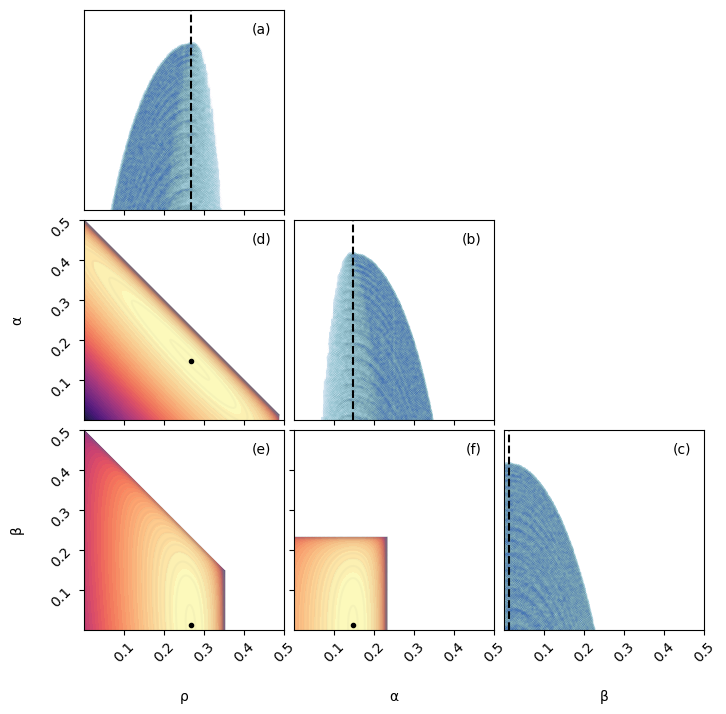

Figure 3. Scenarios A and B: Likelihood estimation of ρ, α, and β without adjustment.


In [37]:
# Plot results

# Extract MLE parameter values
rho_mle = θ_grid_3D_St[0]
alpha_mle = θ_grid_3D_St[1]
beta_mle = θ_grid_3D_St[2]

# Define the levels for contour plots
levels = np.linspace(-20000, grid_logL_3D_St)
levels_line = 100

# Scatter plot parameters
scatter_kwargs = {"marker": ".", "markersize": 0.05, "alpha": trans}
hist_kwargs = {"histtype": "step", "color": "k", "linestyle": "--"}

# Create corner plot
figure = corner.corner(
    np.vstack([grid_3D[1].ravel(), grid_3D[0].ravel(), grid_3D[2].ravel()]).T,
    labels=["ρ", "α", "β"],
    range=[(grid_3D[1].min(), grid_3D[1].max()), (grid_3D[0].min(), grid_3D[0].max()), (grid_3D[2].min(), grid_3D[2].max())],
    plot_datapoints=False,
    plot_density=False,
)

# Reshape the axes array to plot on the diagonal
axes = np.array(figure.axes).reshape((3, 3))

# Randomly sample indices for plotting
idx = np.random.choice(1000**3, 1000**3//3)

# (a) Scatter plot for rho
axes[0, 0].plot(grid_3D[1].ravel()[idx], grid_logs_3D_St.ravel()[idx], **scatter_kwargs)
axes[0, 0].axvline(rho_mle, color='k', ls='--')
axes[0, 0].set_ylim(grid_logs_3D_St.max() - 50, grid_logs_3D_St.max() + 10)
axes[0, 0].set_xlim(0, 0.5)
axes[0, 0].plot(0, 0, 'or', alpha=0, label="(a)")
axes[0, 0].legend(frameon=False)

# (b) Scatter plot for alpha
axes[1, 1].plot(grid_3D[0].ravel()[idx], grid_logs_3D_St.ravel()[idx], **scatter_kwargs)
axes[1, 1].axvline(alpha_mle, color='k', ls='--')
axes[1, 1].set_ylim(grid_logs_3D_St.max() - 50, grid_logs_3D_St.max() + 10)
axes[1, 1].set_xlim(0, 0.5)
axes[1, 1].plot(0, 0, 'or', alpha=0, label="(b)")
axes[1, 1].legend(frameon=False)

# (c) Scatter plot for beta
axes[2, 2].plot(grid_3D[2].ravel()[idx], grid_logs_3D_St.ravel()[idx], **scatter_kwargs)
axes[2, 2].axvline(beta_mle, color='k', ls='--')
axes[2, 2].set_ylim(grid_logs_3D_St.max() - 50, grid_logs_3D_St.max() + 10)
axes[2, 2].set_xlim(0, 0.5)
axes[2, 2].plot(0, 0, 'or', alpha=0, label="(c)")
axes[2, 2].legend(frameon=False)

# Contour plots off-diagonal

# (d) Contour plot for rho vs alpha
axes[1, 0].contourf(ρs, αs, grid_logs_3D_St[:, :, βs == θ_grid_3D_St[2]].squeeze().T, cmap=cont_color, levels=levels)
axes[1, 0].contour(ρs, αs, grid_logs_3D_St[:, :, βs == θ_grid_3D_St[2]].squeeze().T, colors=line_color, levels=levels_line, linestyles='solid', alpha=0.05)
axes[1, 0].plot(θ_grid_3D_St[0], θ_grid_3D_St[1], 'ok', markersize=3)
axes[1, 0].set(xlim=(0, 0.5), ylim=(0, 0.5))
axes[1, 0].plot(0, 0, 'or', alpha=0, label="(d)")
axes[1, 0].legend(frameon=False)

# (e) Contour plot for rho vs beta
axes[2, 0].contourf(ρs, βs, grid_logs_3D_St[:, αs == θ_grid_3D_St[1], :].squeeze().T, cmap=cont_color, levels=levels)
axes[2, 0].contour(ρs, βs, grid_logs_3D_St[:, αs == θ_grid_3D_St[1], :].squeeze().T, colors=line_color, levels=levels_line, linestyles='solid', alpha=0.05)
axes[2, 0].plot(θ_grid_3D_St[0], θ_grid_3D_St[2], 'ok', markersize=3)
axes[2, 0].set(xlim=(0, 0.5), ylim=(0, 0.5))
axes[2, 0].plot(0, 0, 'or', alpha=0, label="(e)")
axes[2, 0].legend(frameon=False)

# (f) Contour plot for alpha vs beta
axes[2, 1].contourf(αs, βs, grid_logs_3D_St[ρs == θ_grid_3D_St[0], :, :].squeeze().T, cmap=cont_color, levels=levels)
axes[2, 1].contour(αs, βs, grid_logs_3D_St[ρs == θ_grid_3D_St[0], :, :].squeeze().T, colors=line_color, levels=levels_line, linestyles='solid', alpha=0.05)
axes[2, 1].plot(θ_grid_3D_St[1], θ_grid_3D_St[2], 'ok', markersize=3)
axes[2, 1].set(xlim=(0, 0.5), ylim=(0, 0.5))
axes[2, 1].plot(0, 0, 'or', alpha=0, label="(f)")
axes[2, 1].legend(frameon=False)

plt.show()

print('Figure 3. Scenarios A and B: Likelihood estimation of ρ, α, and β without adjustment.')


In [38]:
# Maximum Likelihood Estimation without adjustments using grid search (ρ and α)

grid_logL = np.zeros((pts, pts)) # Initialize a 2D array to store log-likelihood values

# Loop through all possible values of ρ and α
for i, ρ_ in enumerate(ρs): # Iterate over possible values of ρ
    print(i, end=' ', flush=True) # Print the current index of ρ to track progress
    for j, α_ in enumerate(αs): # Iterate over possible values of α
        θ_ = ρ_, α_ # Create a tuple θ of the current parameter values
        grid_logL[i, j] = log_likelihood_St(θ_, D) # Compute log-likelihood for current θ and store in the grid

# Validate the grid and handle potential issues
for i, ρ_ in enumerate(ρs):
    for j, α_ in enumerate(αs):
        try:
            grid_logL[i, j] = grid_logL[i, j] # Re-evaluate log-likelihood value to check for any issues
        except Exception as e:
            print("Problem with", ρ_, α_, ":", e) # Print the problematic parameter values and the exception message
            grid_logL[i, j] = -np.inf # Assign negative infinity to problematic grid points

imax = np.unravel_index(np.argmax(grid_logL), grid_logL.shape) # Find the indices of the maximum log-likelihood value in the grid

# Extract the parameters corresponding to the maximum log-likelihood
# Set β to 0 as we are not adjusting for it in this grid search
θ_grid = (ρs[imax[0]], αs[imax[1]], 0)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [39]:
θ_grid_2D_St = θ_grid # Store the parameters corresponding to the maximum log-likelihood in a separate variable
grid_logs_2D_St = grid_logL # Store the entire grid of log-likelihood values in a separate variable for future reference
grid_logL_2D_St = grid_logL.max() # Store the maximum log-likelihood value found in the grid


In [40]:
print("Maximum Likelihood Estimation without adjustments using grid search (ρ and α): \n")
print("logL={:.3f}".format(grid_logL_2D_St))
print("ρ={:.3f}, α={:.3f}".format(*θ_grid_2D_St))
print("α+ρ<0.5:",(θ_grid_2D_St[0] + θ_grid_2D_St[1]) < 0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_grid_2D_St)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_St(θ_1995_2D, D)))
print("ρ={:.3f}, α={:.3f}".format(*θ_1995_2D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_2D)*100))

Maximum Likelihood Estimation without adjustments using grid search (ρ and α): 

logL=-8826.820
ρ=0.277, α=0.138
α+ρ<0.5: True
F_DL= 11.69%
------------------------------ 
 Laland 1995: 

logL= -8826.794
ρ=0.277, α=0.138
F_DL= 11.74%


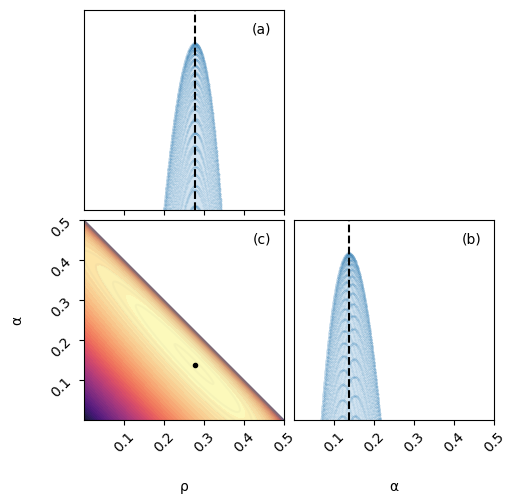

Figure 4. Scenarios A and B: Likelihood estimation for ρ and α without adjustment.


In [41]:
# Plot results

# Extract MLE parameter values 
rho_mle = θ_grid_2D_St[0]
alpha_mle = θ_grid_2D_St[1]

# Define the levels for contour plots
levels = np.linspace(-20000, grid_logs_2D_St.max())
levels_line = 100

# Scatter plot parameters
scatter_kwargs = {"marker": ".", "markersize": 0.5, "alpha": 0.2}
hist_kwargs = {"histtype": "step", "color": "k", "linestyle": "--"}

# Create a corner plot
figure = corner.corner(
    np.vstack([grid_2D[1].ravel(), grid_2D[0].ravel()]).T,
    labels=["ρ", "α"],
    range=[(grid_2D[1].min(), grid_2D[1].max()), (grid_2D[0].min(), grid_2D[0].max())],
    plot_datapoints=False,
    plot_density=False,
)

# Reshape the axes array to plot on the diagonal
axes = np.array(figure.axes).reshape((2, 2))

# Randomly sample indices for plotting
# idx = np.random.choice(1000**2, 1000**3//50)

# (a) Scatter plot for rho
axes[0, 0].plot(grid_2D[1].ravel(), grid_logs_2D_St.ravel(), **scatter_kwargs)
axes[0, 0].axvline(rho_mle, color='k', ls='--')
axes[0, 0].set_ylim(grid_logs_2D_St.max() - 50, grid_logs_2D_St.max() + 10)
axes[0, 0].set_xlim(0, 0.5)
axes[0, 0].plot(0, 0, 'or', alpha=0, label="(a)")
axes[0, 0].legend(frameon=False)

# (b) Scatter plot for alpha
axes[1, 1].plot(grid_2D[0].ravel(), grid_logs_2D_St.ravel(), **scatter_kwargs)
axes[1, 1].axvline(alpha_mle, color='k', ls='--')
axes[1, 1].set_ylim(grid_logs_2D_St.max() - 50, grid_logs_2D_St.max() + 10)
axes[1, 1].set_xlim(0, 0.5)
axes[1, 1].plot(0, 0, 'or', alpha=0, label="(b)")
axes[1, 1].legend(frameon=False)

# Contour plots off-diagonal

# (c) Contour plot for rho vs alpha
axes[1, 0].contourf(ρs, αs, grid_logs_2D_St[:, :].squeeze().T, cmap=cont_color, levels=levels)
axes[1, 0].contour(ρs, αs, grid_logs_2D_St[:, :].squeeze().T, colors=line_color, levels=levels_line, linestyles='solid', alpha=0.05)
axes[1, 0].plot(θ_grid_2D_St[0], θ_grid_2D_St[1], 'ok', markersize=3)
axes[1, 0].set(xlim=(0, 0.5), ylim=(0, 0.5))
axes[1, 0].plot(0, 0, 'or', alpha=0, label="(c)")
axes[1, 0].legend(frameon=False)

# Show the plot
plt.show()

print('Figure 4. Scenarios A and B: Likelihood estimation for ρ and α without adjustment.')


### G-test for goodness-of-fit

#### Three parameters

In [44]:
#  G-test for estimates of ρ=0.267, α=0.148, β=0.012 without adjustments

G_all_ScenarioA_3D, p_all_ScenarioA_3D, Delta_overall_ScenarioA_3D, G_each_ScenarioA_3D, p_each_ScenarioA_3D, Delta_each_ScenarioA_3D = Goodness_of_fit(θ = θ_Nelder_Mead_3D_St, Observed = D, adjust = False)


G-test for ρ=0.267, α=0.148, β=0.012
df overall =  31  df each =  1.82 

------------------------------
Overall:

G= 5.56e+02*,	p_value= 0.000
------------------------------
Each row in dataset:

G= 31.4*,	p_value= 0.000
G= 2.38e+02*,	p_value= 0.000
G= 4.16,	p_value= 0.107
G= 28.7*,	p_value= 0.000
G= 14.6*,	p_value= 0.001
G= 0.77,	p_value= 0.636
G= 3.0,	p_value= 0.195
G= 20.2*,	p_value= 0.000
G= 8.6*,	p_value= 0.011
G= 2.58,	p_value= 0.242
G= 33.0*,	p_value= 0.000
G= 1.56e+02*,	p_value= 0.000
G= 2.0,	p_value= 0.329
G= 3.53,	p_value= 0.148
G= 1.35,	p_value= 0.464
G= 3.01,	p_value= 0.194
G= 4.42,	p_value= 0.094
------------------------------


In [45]:
# Plot Table 5. Scenario A: Results of goodness-of-fit test without adjustment for estimates without adjustment (ρ = 0.267, α = 0.148, β = 0.012)

G_test_ScenarioA_3D = results_table(θ = θ_Nelder_Mead_3D_St, Observed = D, G_each = G_each_ScenarioA_3D, adjust= False, delta= False)

print('\n Table 5. Scenario A: Results of goodness-of-fit test without adjustment for estimates without adjustment (ρ = 0.267, α = 0.148, β = 0.012).')
G_test_ScenarioA_3D


 Table 5. Scenario A: Results of goodness-of-fit test without adjustment for estimates without adjustment (ρ = 0.267, α = 0.148, β = 0.012).


RxR                       RxL  \
                                         R            L            R   
Ramaley (1913)                 841 (874.7)   115 (81.3)  113 (130.1)   
Chamberlain (1928)           6917 (6610.9)  308 (614.1)  411 (361.5)   
Rife (1940)                  1842 (1823.6)  151 (169.4)  140 (135.5)   
Merrell (1957)                 140 (159.2)    34 (14.8)    33 (41.3)   
Annett (1973)                6206 (6290.6)  669 (584.4)  471 (464.3)   
Ferronato et al. (1947)        154 (151.0)    11 (14.0)    31 (31.2)   
Mascie-Taylor (unpub)          232 (227.8)    17 (21.2)    41 (37.4)   
Chaurasia & Goswani (unpub)  1060 (1101.7)  144 (102.3)  122 (130.9)   
Annett (1978)                1656 (1634.2)  130 (151.8)  170 (163.6)   
Carter-Saltzmann (1980)        303 (311.1)    37 (28.9)    45 (46.7)   
Coren & Porac (1980)           315 (350.4)    68 (32.6)    57 (56.9)   
McGee & Cozad (1980)           848 (969.0)   211 (90.0)  325 (370.0)   
McManus (1985) (ICM1)            58 (61.3)      9 (5.7)    14 (14.8)   
McManus (1985) (ICM2prop)      134 (136.3)    15 (12.7)    17 (20.3)   
McManus (1985) (ICM2mat)         74 (71.4)      4 (6.6)      6 (6.2)   
McManus (1985) (ICM2pat)         86 (82.4)      4 (7.6)      8 (7.0)   
Leiber & Axelrod (1981)      1729 (1740.3)  173 (161.7)  281 (268.0)   

                                                LxL                  G  
                                       L          R          L          
Ramaley (1913)                 54 (36.9)    1 (5.0)    7 (3.0)   31.42  
Chamberlain (1928)            53 (102.5)  18 (15.5)    7 (9.5)  237.87  
Rife (1940)                    34 (38.5)    5 (6.8)    6 (4.2)    4.16  
Merrell (1957)                 20 (11.7)    8 (6.2)    2 (3.8)   28.74  
Annett (1973)                125 (131.7)    5 (3.7)    1 (2.3)   14.61  
Ferronato et al. (1947)          9 (8.8)    0 (0.0)    0 (0.0)    0.77  
Mascie-Taylor (unpub)           7 (10.6)    3 (2.5)    1 (1.5)    3.00  
Chaurasia & Goswani (unpub)    46 (37.1)    3 (4.3)    4 (2.7)   20.25  
Annett (1978)                  40 (46.4)    4 (2.5)    0 (1.5)    8.60  
Carter-Saltzmann (1980)        15 (13.3)    0 (0.0)    0 (0.0)    2.58  
Coren & Porac (1980)           16 (16.1)    0 (0.0)    0 (0.0)   33.00  
McGee & Cozad (1980)         150 (105.0)  30 (32.2)  22 (19.8)  156.43  
McManus (1985) (ICM1)            5 (4.2)    0 (0.0)    0 (0.0)    2.00  
McManus (1985) (ICM2prop)        9 (5.7)    1 (0.6)    0 (0.4)    3.53  
McManus (1985) (ICM2mat)         2 (1.8)    0 (0.0)    0 (0.0)    1.35  
McManus (1985) (ICM2pat)         1 (2.0)    0 (0.0)    0 (0.0)    3.01  
Leiber & Axelrod (1981)        63 (76.0)    8 (6.8)    3 (4.2)    4.42

In [46]:
# Summarize differences

df = pd.DataFrame(
    {
        'Laland G value': G_1995_each,
        'My G value': G_each_ScenarioA_3D,
        'Difference': Delta_each_ScenarioA_3D
    },
    index=Laland_index
)

# Values for the Total row
Total_row = pd.DataFrame(
    {
        'Laland G value': [G_1995_overall],
        'My G value': [G_all_ScenarioA_3D],
        'Difference': [G_all_ScenarioA_3D - G_1995_overall]
    },
    index=['Total']
)

# Concatenate the new row to the original DataFrame
df = pd.concat([df, Total_row])

# Function to highlight min, max, and total row values in the 'Difference' column
def highlight_min_max_total(s):
    is_total = s.index == 'Total'
    non_total_values = abs(s[~is_total])
    is_min = non_total_values == non_total_values.min()
    is_max = non_total_values == non_total_values.max()
    return ['background-color: lightblue' if is_total[i] else 'background-color: lightcoral' if is_min.iloc[i] else 'background-color: lightgreen' if is_max.iloc[i] else '' for i in range(len(s))]

styled_df = df.style.apply(highlight_min_max_total, subset=['Difference'])

# Display the styled DataFrame
print("Biggest difference (in green) =", abs(Delta_each_ScenarioA_3D).max())
print("Smallest differenc (in red) =", abs(Delta_each_ScenarioA_3D).min())
print('Difference overall (in blue)=', Delta_overall_ScenarioA_3D)
styled_df


Biggest difference (in green) = 232.78
Smallest differenc (in red) = 0.21
Difference overall (in blue)= -511.3


,Laland G value,My G value,Difference
Ramaley (1913),13.190000,31.420000,-18.230000
Chamberlain (1928),5.090000,237.870000,-232.780000
Rife (1940),4.370000,4.160000,0.210000
Merrell (1957),3.330000,28.740000,-25.410000
Annett (1973),0.900000,14.610000,-13.710000
Ferronato et al. (1947),0.540000,0.770000,-0.230000
Mascie-Taylor (unpub),0.110000,3.000000,-2.890000
Chaurasia & Goswani (unpub),2.270000,20.250000,-17.980000
Annett (1978),3.260000,8.600000,-5.340000
Carter-Saltzmann (1980),0.060000,2.580000,-2.520000


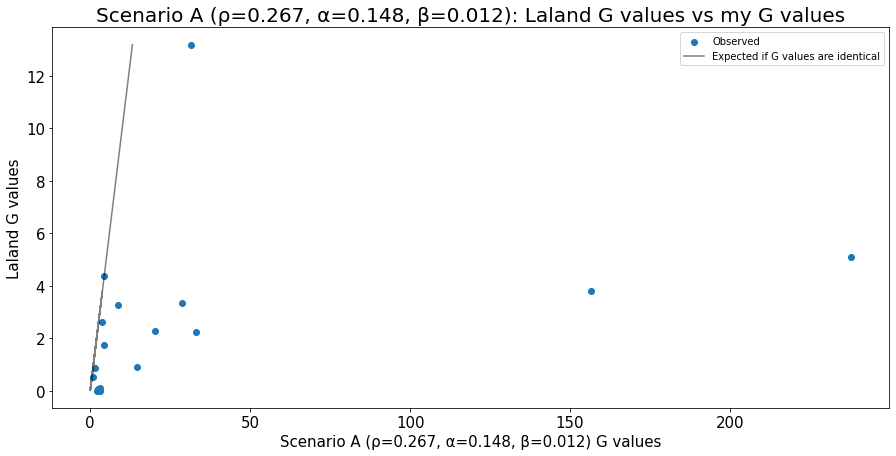

In [47]:
# Visualize Laland G values vs ScenarioA_3D G values

fig, axes = plt.subplots(1, 1, figsize=(15,7))

plt.scatter(x = G_test_ScenarioA_3D['G'], y = G_1995_each, label = 'Observed')

# Add x=y line
plt.plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

# Add labels, title, legend, etc.
plt.xlabel('Scenario A (ρ=0.267, α=0.148, β=0.012) G values', fontsize = font_size_)
plt.ylabel('Laland G values', fontsize = font_size_)
plt.tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
plt.title('Scenario A (ρ=0.267, α=0.148, β=0.012): Laland G values vs my G values', fontsize = font_size_ + 5)
plt.legend()

# Show the plot
plt.show()

#### Two parameters

In [48]:
# G-test for estimates of ρ=0.277, α=0.138, β=0 without adjustments

G_all_ScenarioA_2D, p_all_ScenarioA_2D, Delta_overall_ScenarioA_2D, G_each_ScenarioA_2D, p_each_ScenarioA_2D, Delta_each_ScenarioA_2D = Goodness_of_fit(θ = θ_Nelder_Mead_2D_St, Observed = D, adjust = False)

G-test for ρ=0.277, α=0.138, β=0.000
df overall =  32  df each =  1.88 

------------------------------
Overall:

G= 5.56e+02*,	p_value= 0.000
------------------------------
Each row in dataset:

G= 31.7*,	p_value= 0.000
G= 2.39e+02*,	p_value= 0.000
G= 4.6,	p_value= 0.090
G= 28.3*,	p_value= 0.000
G= 14.6*,	p_value= 0.001
G= 0.77,	p_value= 0.653
G= 3.0,	p_value= 0.204
G= 20.3*,	p_value= 0.000
G= 8.5*,	p_value= 0.012
G= 2.54,	p_value= 0.258
G= 33.0*,	p_value= 0.000
G= 1.56e+02*,	p_value= 0.000
G= 1.98,	p_value= 0.346
G= 3.39,	p_value= 0.167
G= 1.35,	p_value= 0.481
G= 3.03,	p_value= 0.201
G= 4.54,	p_value= 0.093
------------------------------


In [49]:
# Plot Table 6. Scenario A: Results of goodness-of-fit test without adjustment for estimates without adjustment (ρ = 0.277, α = 0.138).

G_test_ScenarioA_2D = results_table(θ = θ_Nelder_Mead_2D_St, Observed = D, G_each = G_each_ScenarioA_2D, adjust= False, delta= False)

print('\n Table 6. Scenario A: Results of goodness-of-fit test without adjustment for estimates without adjustment (ρ = 0.277, α = 0.138)')
G_test_ScenarioA_2D



 Table 6. Scenario A: Results of goodness-of-fit test without adjustment for estimates without adjustment (ρ = 0.277, α = 0.138)


RxR                       RxL  \
                                         R            L            R   
Ramaley (1913)                 841 (874.7)   115 (81.3)  113 (129.8)   
Chamberlain (1928)           6917 (6610.9)  308 (614.1)  411 (360.5)   
Rife (1940)                  1842 (1823.6)  151 (169.4)  140 (135.2)   
Merrell (1957)                 140 (159.2)    34 (14.8)    33 (41.2)   
Annett (1973)                6206 (6290.6)  669 (584.4)  471 (463.1)   
Ferronato et al. (1947)        154 (151.0)    11 (14.0)    31 (31.1)   
Mascie-Taylor (unpub)          232 (227.8)    17 (21.2)    41 (37.3)   
Chaurasia & Goswani (unpub)  1060 (1101.7)  144 (102.3)  122 (130.5)   
Annett (1978)                1656 (1634.2)  130 (151.8)  170 (163.2)   
Carter-Saltzmann (1980)        303 (311.1)    37 (28.9)    45 (46.6)   
Coren & Porac (1980)           315 (350.4)    68 (32.6)    57 (56.7)   
McGee & Cozad (1980)           848 (969.0)   211 (90.0)  325 (369.1)   
McManus (1985) (ICM1)            58 (61.3)      9 (5.7)    14 (14.8)   
McManus (1985) (ICM2prop)      134 (136.3)    15 (12.7)    17 (20.2)   
McManus (1985) (ICM2mat)         74 (71.4)      4 (6.6)      6 (6.2)   
McManus (1985) (ICM2pat)         86 (82.4)      4 (7.6)      8 (7.0)   
Leiber & Axelrod (1981)      1729 (1740.3)  173 (161.7)  281 (267.3)   

                                                LxL                  G  
                                       L          R          L          
Ramaley (1913)                 54 (37.2)    1 (5.1)    7 (2.9)   31.72  
Chamberlain (1928)            53 (103.5)  18 (16.0)    7 (9.0)  238.64  
Rife (1940)                    34 (38.8)    5 (7.0)    6 (4.0)    4.60  
Merrell (1957)                 20 (11.8)    8 (6.4)    2 (3.6)   28.26  
Annett (1973)                125 (132.9)    5 (3.8)    1 (2.2)   14.57  
Ferronato et al. (1947)          9 (8.9)    0 (0.0)    0 (0.0)    0.77  
Mascie-Taylor (unpub)           7 (10.7)    3 (2.6)    1 (1.4)    3.00  
Chaurasia & Goswani (unpub)    46 (37.5)    3 (4.5)    4 (2.5)   20.29  
Annett (1978)                  40 (46.8)    4 (2.6)    0 (1.4)    8.50  
Carter-Saltzmann (1980)        15 (13.4)    0 (0.0)    0 (0.0)    2.54  
Coren & Porac (1980)           16 (16.3)    0 (0.0)    0 (0.0)   33.00  
McGee & Cozad (1980)         150 (105.9)  30 (33.2)  22 (18.8)  155.86  
McManus (1985) (ICM1)            5 (4.2)    0 (0.0)    0 (0.0)    1.98  
McManus (1985) (ICM2prop)        9 (5.8)    1 (0.6)    0 (0.4)    3.39  
McManus (1985) (ICM2mat)         2 (1.8)    0 (0.0)    0 (0.0)    1.35  
McManus (1985) (ICM2pat)         1 (2.0)    0 (0.0)    0 (0.0)    3.03  
Leiber & Axelrod (1981)        63 (76.7)    8 (7.0)    3 (4.0)    4.54

In [50]:
# Summarize differences

df = pd.DataFrame(
    {
        'Laland G value': G_1995_each,
        'My G value': G_each_ScenarioA_2D,
        'Difference': Delta_each_ScenarioA_2D
    },
    index=Laland_index
)

# Values for the Total row
Total_row = pd.DataFrame(
    {
        'Laland G value': [G_1995_overall],
        'My G value': [G_all_ScenarioA_2D],
        'Difference': [G_all_ScenarioA_2D - G_1995_overall]
    },
    index=['Total']
)

# Concatenate the new row to the original DataFrame
df = pd.concat([df, Total_row])

# Function to highlight min, max, and total row values in the 'Difference' column
def highlight_min_max_total(s):
    is_total = s.index == 'Total'
    non_total_values = abs(s[~is_total])
    is_min = non_total_values == non_total_values.min()
    is_max = non_total_values == non_total_values.max()
    return ['background-color: lightblue' if is_total[i] else 'background-color: lightcoral' if is_min.iloc[i] else 'background-color: lightgreen' if is_max.iloc[i] else '' for i in range(len(s))]

styled_df = df.style.apply(highlight_min_max_total, subset=['Difference'])

# Display the styled DataFrame
print("Biggest difference (in green) =", abs(Delta_each_ScenarioA_2D).max())
print("Smallest differenc (in red) =", abs(Delta_each_ScenarioA_2D).min())
print('Difference overall (in blue)=', Delta_overall_ScenarioA_2D)
styled_df


Biggest difference (in green) = 233.55
Smallest differenc (in red) = 0.23
Difference overall (in blue)= -511.6


,Laland G value,My G value,Difference
Ramaley (1913),13.190000,31.720000,-18.530000
Chamberlain (1928),5.090000,238.640000,-233.550000
Rife (1940),4.370000,4.600000,-0.230000
Merrell (1957),3.330000,28.260000,-24.930000
Annett (1973),0.900000,14.570000,-13.670000
Ferronato et al. (1947),0.540000,0.770000,-0.230000
Mascie-Taylor (unpub),0.110000,3.000000,-2.890000
Chaurasia & Goswani (unpub),2.270000,20.290000,-18.020000
Annett (1978),3.260000,8.500000,-5.240000
Carter-Saltzmann (1980),0.060000,2.540000,-2.480000


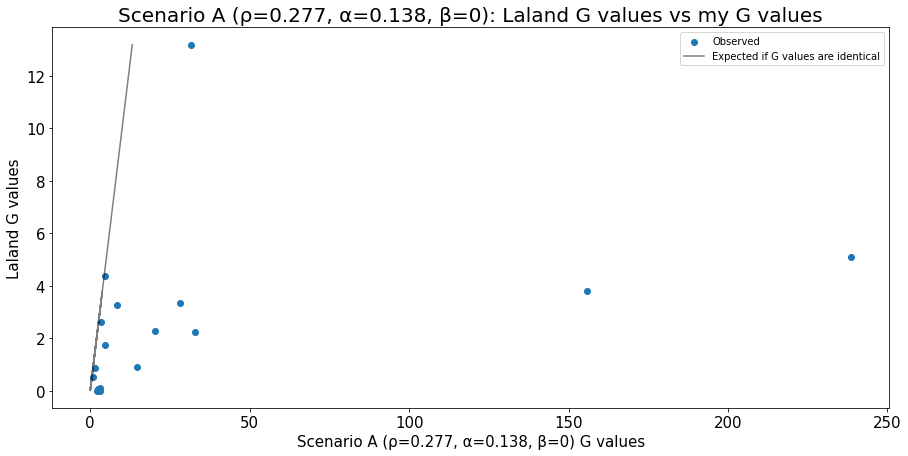

In [51]:
# Visualize Laland G values vs ScenarioA_2D G values

fig, axes = plt.subplots(1, 1, figsize=(15,7))

plt.scatter(x = G_test_ScenarioA_2D['G'], y = G_1995_each, label = 'Observed')

# Add x=y line
plt.plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

# Add labels, title, legend, etc.
plt.xlabel('Scenario A (ρ=0.277, α=0.138, β=0) G values', fontsize = font_size_)
plt.ylabel('Laland G values', fontsize = font_size_)
plt.tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
plt.title('Scenario A (ρ=0.277, α=0.138, β=0): Laland G values vs my G values', fontsize = font_size_ + 5)
plt.legend()

# Show the plot
plt.show()

## Scenario B: Estimating the parameters without adjustments for criterion shift and testing for goodness-of-fit with adjustments for criterion shift

### G-test for goodness-of-fit

#### Three parameters

In [50]:
#  G-test for estimates of ρ=0.267, α=0.148, β=0.012 with adjustments

G_all_ScenarioB_3D, p_all_ScenarioB_3D, Delta_overall_ScenarioB_3D, G_each_ScenarioB_3D, p_each_ScenarioB_3D, Delta_each_ScenarioB_3D = Goodness_of_fit(θ = θ_Nelder_Mead_3D_St, Observed = D, adjust = True)


G-test for ρ=0.267, α=0.148, β=0.012
df overall =  31  df each =  1.82 

------------------------------
Overall:

G= 43.6,	p_value= 0.067
------------------------------
Each row in dataset:

G= 12.7*,	p_value= 0.001
G= 4.65,	p_value= 0.083
G= 3.91,	p_value= 0.121
G= 3.53,	p_value= 0.148
G= 1.08,	p_value= 0.536
G= 0.56,	p_value= 0.716
G= 0.11,	p_value= 0.927
G= 2.12,	p_value= 0.308
G= 3.43,	p_value= 0.156
G= 0.07,	p_value= 0.953
G= 2.21,	p_value= 0.295
G= 3.81,	p_value= 0.128
G= 0.0,	p_value= 1.000
G= 2.7,	p_value= 0.228
G= 0.88,	p_value= 0.598
G= 0.01,	p_value= 0.989
G= 1.8,	p_value= 0.365
------------------------------


In [51]:
# Plot Table 7. Scenario B: Results of goodness-of-fit test with adjustment for estimates without adjustment (ρ = 0.267, α = 0.148, β = 0.012). 

G_test_ScenarioB_3D = results_table(θ = θ_Nelder_Mead_3D_St, Observed = D, G_each = G_each_ScenarioB_3D, adjust= True, delta= False)

print('\n Table 7. Scenario B: Results of goodness-of-fit test with adjustment for estimates without adjustment (ρ = 0.267, α = 0.148, β = 0.012). ')
G_test_ScenarioB_3D


 Table 7. Scenario B: Results of goodness-of-fit test with adjustment for estimates without adjustment (ρ = 0.267, α = 0.148, β = 0.012). 


RxR                       RxL  \
                                         R            L            R   
Ramaley (1913)                 841 (826.7)  115 (129.3)  113 (123.4)   
Chamberlain (1928)           6917 (6906.9)  308 (318.1)  411 (419.7)   
Rife (1940)                  1842 (1838.3)  151 (154.7)  140 (143.8)   
Merrell (1957)                 140 (137.8)    34 (36.2)    33 (37.3)   
Annett (1973)                6206 (6214.3)  669 (660.7)  471 (469.9)   
Ferronato et al. (1947)        154 (152.5)    11 (12.5)    31 (32.5)   
Mascie-Taylor (unpub)          232 (232.7)    17 (16.3)    41 (40.3)   
Chaurasia & Goswani (unpub)  1060 (1067.6)  144 (136.4)  122 (127.0)   
Annett (1978)                1656 (1652.5)  130 (133.5)  170 (174.7)   
Carter-Saltzmann (1980)        303 (301.8)    37 (38.2)    45 (45.5)   
Coren & Porac (1980)           315 (320.5)    68 (62.5)    57 (52.2)   
McGee & Cozad (1980)           848 (828.0)  211 (231.0)  325 (335.5)   
McManus (1985) (ICM1)            58 (58.0)      9 (9.0)    14 (14.0)   
McManus (1985) (ICM2prop)      134 (131.7)    15 (17.3)    17 (19.6)   
McManus (1985) (ICM2mat)         74 (73.1)      4 (4.9)      6 (6.9)   
McManus (1985) (ICM2pat)         86 (85.9)      4 (4.1)      8 (8.1)   
Leiber & Axelrod (1981)      1729 (1737.5)  173 (164.5)  281 (273.4)   

                                                LxL                 G  
                                       L          R          L         
Ramaley (1913)                 54 (43.6)    1 (4.7)    7 (3.3)  12.68  
Chamberlain (1928)             53 (44.3)  18 (21.1)    7 (3.9)   4.65  
Rife (1940)                    34 (30.2)    5 (7.9)    6 (3.1)   3.91  
Merrell (1957)                 20 (15.7)    8 (6.0)    2 (4.0)   3.53  
Annett (1973)                125 (126.1)    5 (3.9)    1 (2.1)   1.08  
Ferronato et al. (1947)          9 (7.5)    0 (0.0)    0 (0.0)   0.56  
Mascie-Taylor (unpub)            7 (7.7)    3 (2.9)    1 (1.1)   0.11  
Chaurasia & Goswani (unpub)    46 (41.0)    3 (4.2)    4 (2.8)   2.12  
Annett (1978)                  40 (35.3)    4 (2.9)    0 (1.1)   3.43  
Carter-Saltzmann (1980)        15 (14.5)    0 (0.0)    0 (0.0)   0.07  
Coren & Porac (1980)           16 (20.8)    0 (0.0)    0 (0.0)   2.21  
McGee & Cozad (1980)         150 (139.5)  30 (32.3)  22 (19.7)   3.81  
McManus (1985) (ICM1)            5 (5.0)    0 (0.0)    0 (0.0)   0.00  
McManus (1985) (ICM2prop)        9 (6.4)    1 (0.6)    0 (0.4)   2.70  
McManus (1985) (ICM2mat)         2 (1.1)    0 (0.0)    0 (0.0)   0.88  
McManus (1985) (ICM2pat)         1 (0.9)    0 (0.0)    0 (0.0)   0.01  
Leiber & Axelrod (1981)        63 (70.6)    8 (7.2)    3 (3.8)   1.80

In [52]:
# Summarize differences

df = pd.DataFrame(
    {
        'Laland G value': G_1995_each,
        'My G value': G_each_ScenarioB_3D,
        'Difference': Delta_each_ScenarioB_3D
    },
    index=Laland_index
)

# Values for the Total row
Total_row = pd.DataFrame(
    {
        'Laland G value': [G_1995_overall],
        'My G value': [G_all_ScenarioB_3D],
        'Difference': [G_all_ScenarioB_3D - G_1995_overall]
    },
    index=['Total']
)

# Concatenate the new row to the original DataFrame
df = pd.concat([df, Total_row])

# Function to highlight min, max, and total row values in the 'Difference' column
def highlight_min_max_total(s):
    is_total = s.index == 'Total'
    non_total_values = abs(s[~is_total])
    is_min = non_total_values == non_total_values.min()
    is_max = non_total_values == non_total_values.max()
    return ['background-color: lightblue' if is_total[i] else 'background-color: lightcoral' if is_min.iloc[i] else 'background-color: lightgreen' if is_max.iloc[i] else '' for i in range(len(s))]

styled_df = df.style.apply(highlight_min_max_total, subset=['Difference'])

# Display the styled DataFrame
print("Biggest difference (in green) =", abs(Delta_each_ScenarioB_3D).max())
print("Smallest differenc (in red) =", abs(Delta_each_ScenarioB_3D).min())
print('Difference overall (in blue)=', Delta_overall_ScenarioB_3D)
styled_df


Biggest difference (in green) = 0.51
Smallest differenc (in red) = 0.0
Difference overall (in blue)= 0.87


,Laland G value,My G value,Difference
Ramaley (1913),13.190000,12.680000,0.510000
Chamberlain (1928),5.090000,4.650000,0.440000
Rife (1940),4.370000,3.910000,0.460000
Merrell (1957),3.330000,3.530000,-0.200000
Annett (1973),0.900000,1.080000,-0.180000
Ferronato et al. (1947),0.540000,0.560000,-0.020000
Mascie-Taylor (unpub),0.110000,0.110000,0.000000
Chaurasia & Goswani (unpub),2.270000,2.120000,0.150000
Annett (1978),3.260000,3.430000,-0.170000
Carter-Saltzmann (1980),0.060000,0.070000,-0.010000


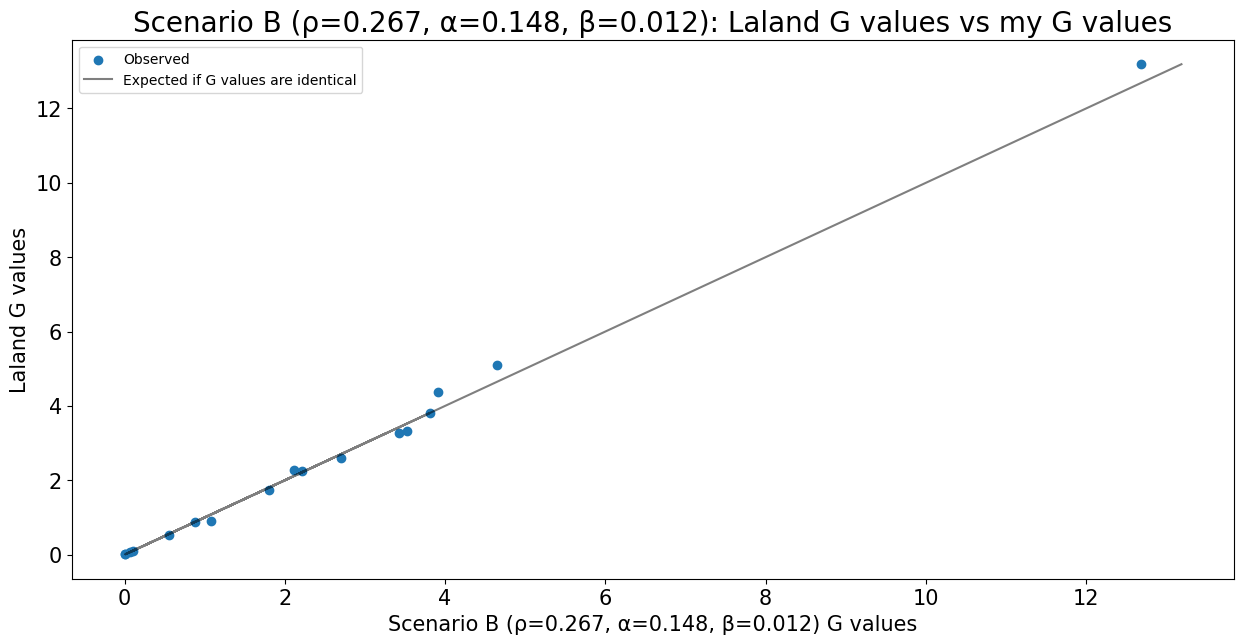

In [53]:
# Visualize Laland G values vs ScenarioB_3D G values

fig, axes = plt.subplots(1, 1, figsize=(15,7))

plt.scatter(x = G_test_ScenarioB_3D['G'], y = G_1995_each, label = 'Observed')

# Add x=y line
plt.plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

# Add labels, title, legend, etc.
plt.xlabel('Scenario B (ρ=0.267, α=0.148, β=0.012) G values', fontsize = font_size_)
plt.ylabel('Laland G values', fontsize = font_size_)
plt.tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
plt.title('Scenario B (ρ=0.267, α=0.148, β=0.012): Laland G values vs my G values', fontsize = font_size_ + 5)
plt.legend()

# Show the plot
plt.show()

#### Two parameters

In [54]:
#  G-test for estimated of ρ=0.277, α=0.128, β=0 with adjustments

G_all_ScenarioB_2D, p_all_ScenarioB_2D, Delta_overall_ScenarioB_2D, G_each_ScenarioB_2D, p_each_ScenarioB_2D, Delta_each_ScenarioB_2D = Goodness_of_fit(θ = θ_Nelder_Mead_2D_St, Observed = D, adjust = True)

G-test for ρ=0.277, α=0.138, β=0.000
df overall =  32  df each =  1.88 

------------------------------
Overall:

G= 44.4,	p_value= 0.071
------------------------------
Each row in dataset:

G= 13.2*,	p_value= 0.001
G= 5.1,	p_value= 0.070
G= 4.37,	p_value= 0.102
G= 3.33,	p_value= 0.172
G= 0.91,	p_value= 0.606
G= 0.54,	p_value= 0.738
G= 0.11,	p_value= 0.934
G= 2.27,	p_value= 0.298
G= 3.26,	p_value= 0.179
G= 0.06,	p_value= 0.961
G= 2.25,	p_value= 0.300
G= 3.8,	p_value= 0.135
G= 0.0,	p_value= 1.000
G= 2.61,	p_value= 0.250
G= 0.88,	p_value= 0.614
G= 0.01,	p_value= 0.991
G= 1.75,	p_value= 0.389
------------------------------


In [55]:
# Plot Table 8. Scenario B: Results of goodness-of-fit test with adjustment for estimates without adjustment (ρ = 0.277, α = 0.138). 

G_test_ScenarioB_2D = results_table(θ = θ_Nelder_Mead_2D_St, Observed = D, G_each = G_each_ScenarioB_2D, adjust= True, delta= False)

print('\n Table 8. Scenario B: Results of goodness-of-fit test with adjustment for estimates without adjustment (ρ = 0.277, α = 0.138).')
G_test_ScenarioB_2D


 Table 8. Scenario B: Results of goodness-of-fit test with adjustment for estimates without adjustment (ρ = 0.277, α = 0.138).


RxR                       RxL  \
                                         R            L            R   
Ramaley (1913)                 841 (826.7)  115 (129.3)  113 (123.3)   
Chamberlain (1928)           6917 (6906.8)  308 (318.2)  411 (419.8)   
Rife (1940)                  1842 (1838.3)  151 (154.7)  140 (143.8)   
Merrell (1957)                 140 (137.8)    34 (36.2)    33 (37.2)   
Annett (1973)                6206 (6214.0)  669 (661.0)  471 (469.9)   
Ferronato et al. (1947)        154 (152.6)    11 (12.4)    31 (32.5)   
Mascie-Taylor (unpub)          232 (232.7)    17 (16.3)    41 (40.3)   
Chaurasia & Goswani (unpub)  1060 (1067.7)  144 (136.3)  122 (126.8)   
Annett (1978)                1656 (1652.4)  130 (133.6)  170 (174.7)   
Carter-Saltzmann (1980)        303 (301.8)    37 (38.2)    45 (45.5)   
Coren & Porac (1980)           315 (320.5)    68 (62.5)    57 (52.1)   
McGee & Cozad (1980)           848 (828.1)  211 (230.9)  325 (334.9)   
McManus (1985) (ICM1)            58 (58.0)      9 (9.0)    14 (14.0)   
McManus (1985) (ICM2prop)      134 (131.7)    15 (17.3)    17 (19.6)   
McManus (1985) (ICM2mat)         74 (73.1)      4 (4.9)      6 (6.9)   
McManus (1985) (ICM2pat)         86 (85.9)      4 (4.1)      8 (8.1)   
Leiber & Axelrod (1981)      1729 (1737.5)  173 (164.5)  281 (273.1)   

                                                LxL                 G  
                                       L          R          L         
Ramaley (1913)                 54 (43.7)    1 (4.9)    7 (3.1)  13.19  
Chamberlain (1928)             53 (44.2)  18 (21.3)    7 (3.7)   5.10  
Rife (1940)                    34 (30.2)    5 (8.0)    6 (3.0)   4.37  
Merrell (1957)                 20 (15.8)    8 (6.1)    2 (3.9)   3.33  
Annett (1973)                125 (126.1)    5 (4.0)    1 (2.0)   0.91  
Ferronato et al. (1947)          9 (7.5)    0 (0.0)    0 (0.0)   0.54  
Mascie-Taylor (unpub)            7 (7.7)    3 (3.0)    1 (1.0)   0.11  
Chaurasia & Goswani (unpub)    46 (41.2)    3 (4.4)    4 (2.6)   2.27  
Annett (1978)                  40 (35.3)    4 (3.0)    0 (1.0)   3.26  
Carter-Saltzmann (1980)        15 (14.5)    0 (0.0)    0 (0.0)   0.06  
Coren & Porac (1980)           16 (20.9)    0 (0.0)    0 (0.0)   2.25  
McGee & Cozad (1980)         150 (140.1)  30 (32.7)  22 (19.3)   3.80  
McManus (1985) (ICM1)            5 (5.0)    0 (0.0)    0 (0.0)   0.00  
McManus (1985) (ICM2prop)        9 (6.4)    1 (0.6)    0 (0.4)   2.61  
McManus (1985) (ICM2mat)         2 (1.1)    0 (0.0)    0 (0.0)   0.88  
McManus (1985) (ICM2pat)         1 (0.9)    0 (0.0)    0 (0.0)   0.01  
Leiber & Axelrod (1981)        63 (70.9)    8 (7.4)    3 (3.6)   1.75

In [56]:
# Summarize differences

df = pd.DataFrame(
    {
        'Laland G value': G_1995_each,
        'My G value': G_each_ScenarioB_2D,
        'Difference': Delta_each_ScenarioB_2D
    },
    index=Laland_index
)

# Values for the Total row
Total_row = pd.DataFrame(
    {
        'Laland G value': [G_1995_overall],
        'My G value': [G_all_ScenarioB_2D],
        'Difference': [G_all_ScenarioB_2D - G_1995_overall]
    },
    index=['Total']
)

# Concatenate the new row to the original DataFrame
df = pd.concat([df, Total_row])

# Function to highlight min, max, and total row values in the 'Difference' column
def highlight_min_max_total(s):
    is_total = s.index == 'Total'
    non_total_values = abs(s[~is_total])
    is_min = non_total_values == non_total_values.min()
    is_max = non_total_values == non_total_values.max()
    return ['background-color: lightblue' if is_total[i] else 'background-color: lightcoral' if is_min.iloc[i] else 'background-color: lightgreen' if is_max.iloc[i] else '' for i in range(len(s))]

styled_df = df.style.apply(highlight_min_max_total, subset=['Difference'])

# Display the styled DataFrame
print("Biggest difference (in green) =", abs(Delta_each_ScenarioB_2D).max())
print("Smallest differenc (in red) =", abs(Delta_each_ScenarioB_2D).min())
print('Difference overall (in blue)=', Delta_overall_ScenarioB_2D)
styled_df

Biggest difference (in green) = 0.01
Smallest differenc (in red) = 0.0
Difference overall (in blue)= 0.0


,Laland G value,My G value,Difference
Ramaley (1913),13.190000,13.190000,0.000000
Chamberlain (1928),5.090000,5.100000,-0.010000
Rife (1940),4.370000,4.370000,0.000000
Merrell (1957),3.330000,3.330000,0.000000
Annett (1973),0.900000,0.910000,-0.010000
Ferronato et al. (1947),0.540000,0.540000,0.000000
Mascie-Taylor (unpub),0.110000,0.110000,0.000000
Chaurasia & Goswani (unpub),2.270000,2.270000,0.000000
Annett (1978),3.260000,3.260000,0.000000
Carter-Saltzmann (1980),0.060000,0.060000,0.000000


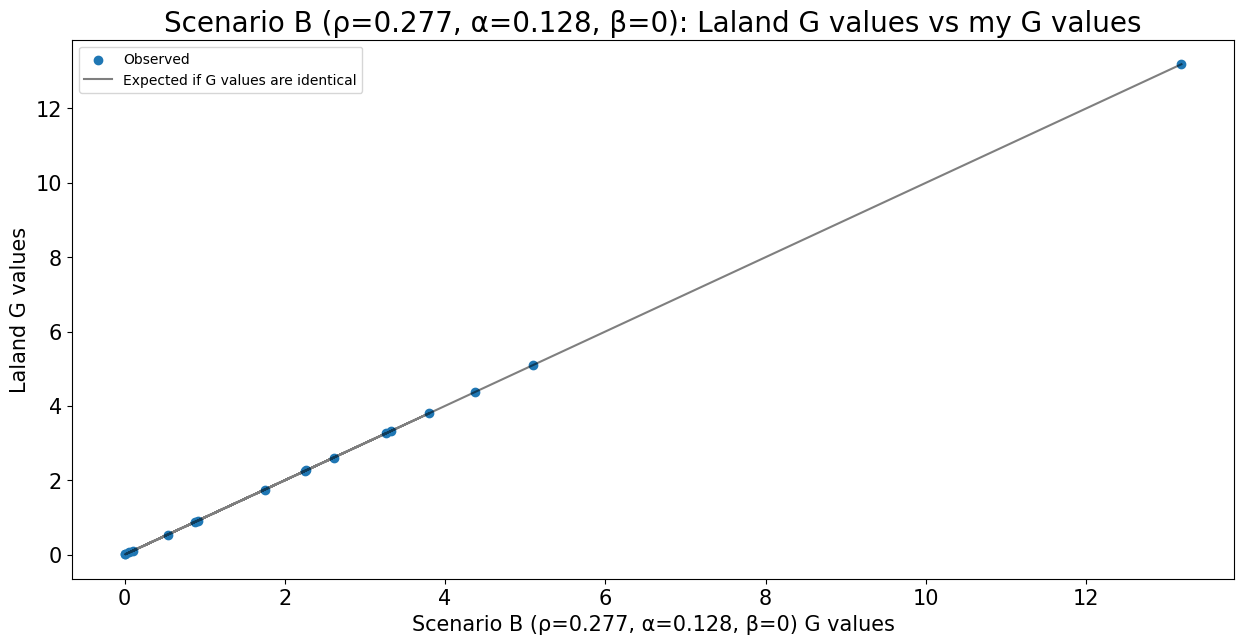

In [57]:
# Visualize Laland G values vs ScenarioB_2D G values

fig, axes = plt.subplots(1, 1, figsize=(15,7))

plt.scatter(x = G_test_ScenarioB_2D['G'], y = G_1995_each, label = 'Observed')

# Add x=y line
plt.plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

# Add labels, title, legend, etc.
plt.xlabel('Scenario B (ρ=0.277, α=0.128, β=0) G values', fontsize = font_size_)
plt.ylabel('Laland G values', fontsize = font_size_)
plt.tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
plt.title('Scenario B (ρ=0.277, α=0.128, β=0): Laland G values vs my G values', fontsize = font_size_ + 5)
plt.legend()

# Show the plot
plt.show()

## Scenario C: Estimating the parameters and testing for goodness-of-fit with adjustments for criterion shift

### Maximum Likelihood Estimation

#### Nelder-Mead simplex algorithm (with 1,000 initial random guesses)

In [58]:
#  Maximum Likelihood Estimation with adjustments using Nelder-Mead (ρ, α, and β)
θ_Nelder_Mead_3D_Sm, Nelder_Mead_logL_3D_Sm = fit(n_parameters = 3, data = D, adjust = True)

[0.02332037 0.40719369 0.00369368] -8593.641042358942


/opt/tljh/user/lib/python3.9/site-packages/scipy/optimize/_optimize.py:790: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


[0.20723802 0.20341589 0.04206751] -8566.939424642467
[0.20727592 0.20337252 0.04200258] -8566.939424532733
[0.20727637 0.20337344 0.04202182] -8566.93942438454
[0.20721823 0.20342429 0.04209279] -8566.939423860884
[0.20721327 0.2034261  0.04206571] -8566.93942372568
[0.20720636 0.20343712 0.04208018] -8566.939423493592
[0.20724464 0.20339899 0.04205649] -8566.939423393915
[0.20721024 0.20343592 0.04209008] -8566.939423383155
[0.20725396 0.20339119 0.04203281] -8566.939423342217
[0.20723744 0.20340601 0.04204755] -8566.93942316468
[0.20722285 0.20342232 0.0420775 ] -8566.93942316379
[0.20722104 0.20342445 0.04207764] -8566.93942315812


In [59]:
θ_Nelder_Mead_3D_Sm = θ_Nelder_Mead_3D_Sm.round(3) # Store the parameters corresponding to the maximum log-likelihood in a separate variable

In [60]:
print("Maximum Likelihood Estimation with adjustments using Nelder-Mead (ρ, α, and β):" ,'\n')
print("logL= {:.3f}".format(Nelder_Mead_logL_3D_Sm))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_Nelder_Mead_3D_Sm))
print("α+ρ<0.5:",θ_Nelder_Mead_3D_Sm[:2].sum()<0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_Nelder_Mead_3D_Sm)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_Sm(θ_1995_3D, D)))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_1995_3D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_3D)*100))

Maximum Likelihood Estimation with adjustments using Nelder-Mead (ρ, α, and β): 

logL= -8566.939
ρ=0.207, α=0.203, β=0.042
α+ρ<0.5: True
F_DL= 13.50%
------------------------------ 
 Laland 1995: 

logL= -8570.558
ρ=0.267, α=0.148, β=0.012
F_DL= 11.72%


In [61]:
# Maximum Likelihood Estimation with adjustments using Nelder-Mead (ρ and α)
θ_Nelder_Mead_2D_Sm, Nelder_Mead_logL_2D_Sm = fit(n_parameters = 2, data = D, adjust = True)

[0.23888677 0.17201921] -8567.52946045087
[0.23894213 0.17198614] -8567.529457512264
[0.23892831 0.17199022] -8567.529456433665
[0.23893068 0.17199368] -8567.529456305803
[0.23892773 0.17199501] -8567.529456113029


In [62]:
θ_Nelder_Mead_2D_Sm = θ_Nelder_Mead_2D_Sm.round(3) # Store the parameters corresponding to the maximum log-likelihood in a separate variable
θ_Nelder_Mead_2D_Sm = np.append(arr = θ_Nelder_Mead_2D_Sm, values = 0) # Add β = 0 to θ array

In [63]:
print("Maximum Likelihood Estimation with adjustments using Nelder-Mead (ρ and α)" ,'\n')
print("logL= {:.3f}".format(Nelder_Mead_logL_2D_Sm))
print("ρ={:.3f}, α={:.3f}".format(*θ_Nelder_Mead_2D_Sm))
print("α+ρ<0.5:",θ_Nelder_Mead_2D_Sm[:2].sum()<0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_Nelder_Mead_2D_Sm)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_Sm(θ_1995_2D, D)))
print("ρ={:.3f}, α={:.3f}".format(*θ_1995_2D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_2D)*100))

Maximum Likelihood Estimation with adjustments using Nelder-Mead (ρ and α) 

logL= -8567.529
ρ=0.239, α=0.172
α+ρ<0.5: True
F_DL= 13.57%
------------------------------ 
 Laland 1995: 

logL= -8570.995
ρ=0.277, α=0.138
F_DL= 11.74%


#### Grid search with 1,000 values for each parameter (overall 10003 parameter combinations)

In [64]:
# Build a grid size pts^3

pts = 1000 # Number of points in each dimension
ρs = np.linspace(0, 1, pts) # Create evenly spaced pts numbers between 1 and 0 for  ρ
αs = np.linspace(0, 1, pts) # Create evenly spaced pts numbers between 1 and 0 for  α
βs = np.linspace(0, 1, pts) # Create evenly spaced pts numbers between 1 and 0 for  β

grid_3D = np.meshgrid(ρs, αs, βs) # Generate a 3D grid for ρ, α, and β
grid_2D= np.meshgrid(ρs, αs) # Generate a 2D grid for ρ and α

print("3D Grid Shapes:", [g.shape for g in grid_3D])
print("2D Grid Shapes:", [g.shape for g in grid_2D])


3D Grid Shapes: [(1000, 1000, 1000), (1000, 1000, 1000), (1000, 1000, 1000)]
2D Grid Shapes: [(1000, 1000), (1000, 1000)]


In [65]:
# Maximum Likelihood Estimation with adjustments using grid search (ρ, α, and β)

grid_logL = np.zeros((pts, pts, pts)) # Initialize a 3D array to store log-likelihood values

# Loop through all possible values of ρ, α, and β
for i, ρ_ in enumerate(ρs): # Iterate over possible values of ρ
    print(i, end=' ', flush=True) # Print the current index of ρ to track progress
    for j, α_ in enumerate(αs): # Iterate over possible values of α
        for k, β_ in enumerate(βs): # Iterate over possible values of β
            θ_ = ρ_, α_, β_ # Create a tuple θ of the current parameter values
            grid_logL[i,j,k] = log_likelihood_Sm(θ_, D) # Compute log-likelihood for current θ and store in the grid

# Validate the grid and handle potential issues
for i, ρ_ in enumerate(ρs):
    for j, α_ in enumerate(αs):
        for k, β_ in enumerate(βs):
            try: 
                grid_logL[i,j,k] = grid_logL[i,j,k] # Re-evaluate log-likelihood value to check for any issues
            except Exception as e:
                    print("Problem with", ρ_, α_, β_, ":", e) # Print the problematic parameter values and the exception message
                    grid_logL[i,j,k] = -np.inf # Assign negative infinity to problematic grid points

imax = np.unravel_index(np.argmax(grid_logL), grid_logL.shape) # Find the indices of the maximum log-likelihood value in the grid
θ_grid=(ρs[imax[0]], αs[imax[1]], βs[imax[2]]) # Extract the parameters corresponding to the maximum log-likelihood

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [66]:
θ_grid_3D_Sm = θ_grid # Store the parameters corresponding to the maximum log-likelihood in a separate variable
grid_logs_3D_Sm = grid_logL # Store the entire grid of log-likelihood values in a separate variable for future reference
grid_logL_3D_Sm = grid_logL.max() # Store the maximum log-likelihood value found in the grid

In [67]:
print("Maximum Likelihood Estimation with adjustments using grid search (ρ, α, and β) \n")
print("logL={:.3f}".format(grid_logL_3D_Sm))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_grid_3D_Sm))
print("α+ρ<0.5:",(θ_grid_3D_Sm[0] + θ_grid_3D_Sm[1]) < 0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_grid_3D_Sm)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_Sm(θ_1995_3D, D)))
print("ρ={:.3f}, α={:.3f}, β={:.3f}".format(*θ_1995_3D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_3D)*100))

Maximum Likelihood Estimation with adjustments using grid search (ρ, α, and β) 

logL=-8566.940
ρ=0.207, α=0.203, β=0.042
α+ρ<0.5: True
F_DL= 13.44%
------------------------------ 
 Laland 1995: 

logL= -8570.558
ρ=0.267, α=0.148, β=0.012
F_DL= 11.72%


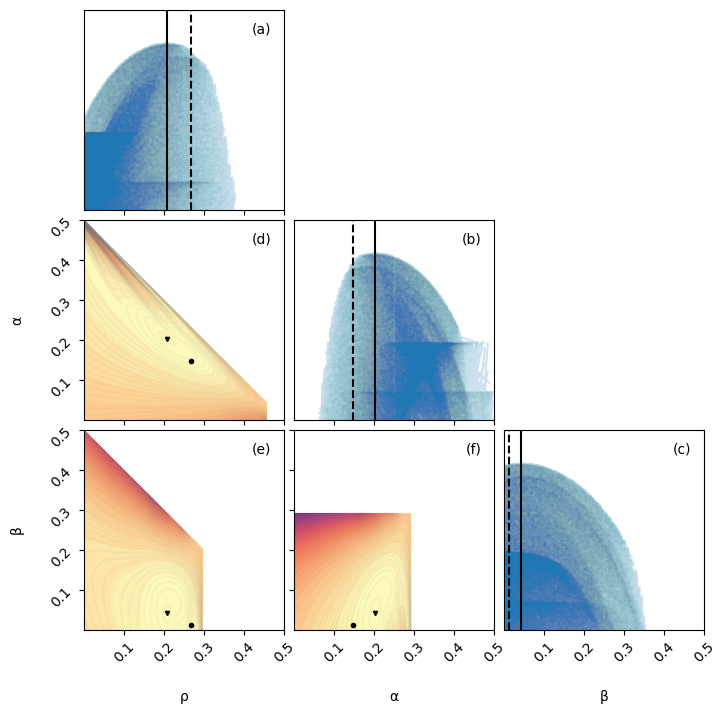

Figure 6. Scenario C: Likelihood estimation for ρ and α with adjustment.


In [101]:
# Plot results

# Extract MLE parameter values
rho_mle = θ_grid_3D_Sm[0]
alpha_mle = θ_grid_3D_Sm[1]
beta_mle = θ_grid_3D_Sm[2]

# Define the levels for contour plots
levels =np.linspace(-10000, grid_logL_3D_Sm)
levels_line = 100

# Scatter plot parameters
scatter_kwargs = {"marker": ".", "markersize": 0.05, "alpha": trans}
hist_kwargs = {"histtype": "step", "color": "k", "linestyle": "--"}

# Create corner plot
figure = corner.corner(
    np.vstack([grid_3D[1].ravel(), grid_3D[0].ravel(), grid_3D[2].ravel()]).T,
    labels=["ρ", "α", "β"],
    range=[(grid_3D[1].min(), grid_3D[1].max()), (grid_3D[0].min(), grid_3D[0].max()), (grid_3D[2].min(), grid_3D[2].max())],
    plot_datapoints = False,
    plot_density=False,
)

# Reshape the axes array to plot on the diagonal
axes = np.array(figure.axes).reshape((3, 3))

# Randomly sample indices for plotting
idx = np.random.choice(1000**3, 1000**3//20)

# (a) Scatter plot for rho
axes[0, 0].plot(grid_3D[1].ravel()[idx], grid_logs_3D_Sm.ravel()[idx], **scatter_kwargs)
axes[0, 0].axvline(rho_mle, color='k', ls='-')
axes[0, 0].axvline(θ_grid_3D_St[0], color='k', ls='--') # MLE rho value scenario A
axes[0, 0].set_ylim(grid_logs_3D_Sm.max() - 50, grid_logs_3D_Sm.max() + 10)
axes[0, 0].set_xlim(0,0.5)
axes[0, 0].plot(0, 0, 'or', alpha = 0, label = "(a)")
axes[0, 0].legend(frameon = False)

# (b) Scatter plot for alpha
axes[1, 1].plot(grid_3D[0].ravel()[idx], grid_logs_3D_Sm.ravel()[idx], **scatter_kwargs)
axes[1, 1].axvline(alpha_mle, color='k', ls='-')
axes[1, 1].axvline(θ_grid_3D_St[1], color='k', ls='--') # MLE alpha value scenario A
axes[1, 1].set_ylim(grid_logs_3D_Sm.max() - 50, grid_logs_3D_Sm.max() + 10)
axes[1, 1].set_xlim(0,0.5)
axes[1, 1].plot(0, 0, 'or', alpha = 0, label = "(b)")
axes[1, 1].legend(frameon = False)

# (c) Scatter plot for beta
axes[2, 2].plot(grid_3D[2].ravel()[idx], grid_logs_3D_Sm.ravel()[idx], **scatter_kwargs)
axes[2, 2].axvline(beta_mle, color='k', ls='-')
axes[2, 2].axvline(θ_grid_3D_St[2], color='k', ls='--') # MLE beta value scenario A
axes[2, 2].set_ylim(grid_logs_3D_Sm.max() - 50, grid_logs_3D_Sm.max() + 10)
axes[2, 2].set_xlim(0,0.5)
axes[2, 2].plot(0, 0, 'or', alpha = 0, label = "(c)")
axes[2, 2].legend(frameon = False)


# Contour plots off-diagonal

# (d) Contour plot for rho vs alpha
axes[1, 0].contourf(ρs, αs, grid_logs_3D_Sm[:,:,βs==θ_grid_3D_Sm[2]].squeeze().T, cmap=cont_color, levels=levels)
axes[1, 0].contour(ρs, αs, grid_logs_3D_Sm[:,:,βs==θ_grid_3D_Sm[2]].squeeze().T,  colors=line_color, levels= levels_line, linestyles='solid', alpha= 0.05)
axes[1, 0].plot(θ_grid_3D_Sm[0],θ_grid_3D_Sm[1], 'vk', markersize = 3)
axes[1, 0].plot(θ_grid_3D_St[0],θ_grid_3D_St[1], 'ok', markersize = 3) # MLE rho vs alpha values scenario A
axes[1, 0].set(xlim=(0, 0.5), ylim=(0,0.5))
axes[1, 0].plot(0, 0, 'or', alpha = 0, label = "(d)")
axes[1, 0].legend(frameon = False)


# (e) Contour plot for rho vs beta     
axes[2, 0].contourf(ρs, βs, grid_logs_3D_Sm[:,αs==θ_grid_3D_Sm[1],:].squeeze().T, cmap=cont_color, levels=levels)
axes[2, 0].contour(ρs, βs, grid_logs_3D_Sm[:,αs==θ_grid_3D_Sm[1],:].squeeze().T,  colors=line_color, levels= levels_line, linestyles='solid', alpha= 0.05)
axes[2, 0].plot(θ_grid_3D_Sm[0],θ_grid_3D_Sm[2],'vk', markersize = 3)
axes[2, 0].plot(θ_grid_3D_St[0],θ_grid_3D_St[2], 'ok', markersize = 3) # MLE rho vs beta values scenario A
axes[2, 0].set(xlim=(0, 0.5), ylim=(0,0.5))
axes[2, 0].plot(0, 0, 'or', alpha = 0, label = "(e)")
axes[2, 0].legend(frameon = False)


# (f) Contour plot for alpha vs beta   
axes[2, 1].contourf(αs, βs, grid_logs_3D_Sm[ρs==θ_grid_3D_Sm[0],:,:].squeeze().T, cmap=cont_color, levels=levels)
axes[2, 1].contour(αs, βs, grid_logs_3D_Sm[ρs==θ_grid_3D_Sm[0],:,:].squeeze().T,  colors=line_color, levels= levels_line, linestyles='solid', alpha= 0.05)
axes[2, 1].plot(θ_grid_3D_Sm[1],θ_grid_3D_Sm[2],'vk', markersize = 3)
axes[2, 1].plot(θ_grid_3D_St[1],θ_grid_3D_St[2], 'ok', markersize = 3) # MLE alpha vs beta values scenario A
axes[2, 1].set(xlim=(0, 0.5), ylim=(0,0.5))
axes[2, 1].plot(0, 0, 'or', alpha = 0, label = "(f)")
axes[2, 1].legend(frameon = False)

plt.show()

print('Figure 6. Scenario C: Likelihood estimation for ρ and α with adjustment.')


In [69]:
#  Maximum Likelihood Estimation with adjustments using grid search (ρ and α)

grid_logL = np.zeros((pts, pts)) # Initialize a 2D array to store log-likelihood values

# Loop through all possible values of ρ and α
for i, ρ_ in enumerate(ρs): # Iterate over possible values of ρ
    print(i, end=' ', flush=True) # Print the current index of ρ to track progress
    for j, α_ in enumerate(αs): # Iterate over possible values of α
        θ_ = ρ_, α_ # Create a tuple θ of the current parameter values
        grid_logL[i,j] = log_likelihood_Sm(θ_, D) # Compute log-likelihood for current θ and store in the grid

# Validate the grid and handle potential issues
for i, ρ_ in enumerate(ρs):
    for j, α_ in enumerate(αs):
        try: 
            grid_logL[i,j] = grid_logL[i,j] # Re-evaluate log-likelihood value to check for any issues
        except Exception as e:
                print("Problem with", ρ_, α_, ":", e) # Print the problematic parameter values and the exception message
                grid_logL[i,j] = -np.inf # Assign negative infinity to problematic grid points

imax = np.unravel_index(np.argmax(grid_logL), grid_logL.shape) # Find the indices of the maximum log-likelihood value in the grid

# Extract the parameters corresponding to the maximum log-likelihood
# Set β to 0 as we are not adjusting for it in this grid search
θ_grid = (ρs[imax[0]], αs[imax[1]], 0)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [70]:
θ_grid_2D_Sm = θ_grid # Store the parameters corresponding to the maximum log-likelihood in a separate variable
grid_logs_2D_Sm = grid_logL # Store the entire grid of log-likelihood values in a separate variable for future reference
grid_logL_2D_Sm = grid_logL.max() # Store the maximum log-likelihood value found in the grid

In [71]:
print("Maximum Likelihood Estimation with adjustments using grid search (ρ and α) \n")
print("logL={:.3f}".format(grid_logL_2D_Sm))
print("ρ={:.3f}, α={:.3f}".format(*θ_grid_2D_Sm))
print("α+ρ<0.5:",(θ_grid_2D_Sm[0] + θ_grid_2D_Sm[1]) < 0.5)
print("F_DL= {:.2f}%".format(compute_t(*θ_grid_2D_Sm)*100))

print("-"*30,"\n", "Laland 1995:", '\n'),
print("logL= {:.3f}".format(log_likelihood_Sm(θ_1995_2D, D)))
print("ρ={:.3f}, α={:.3f}".format(*θ_1995_2D))
print("F_DL= {:.2f}%".format(compute_t(*θ_1995_2D)*100))

Maximum Likelihood Estimation with adjustments using grid search (ρ and α) 

logL=-8567.534
ρ=0.239, α=0.172
α+ρ<0.5: True
F_DL= 13.51%
------------------------------ 
 Laland 1995: 

logL= -8570.995
ρ=0.277, α=0.138
F_DL= 11.74%


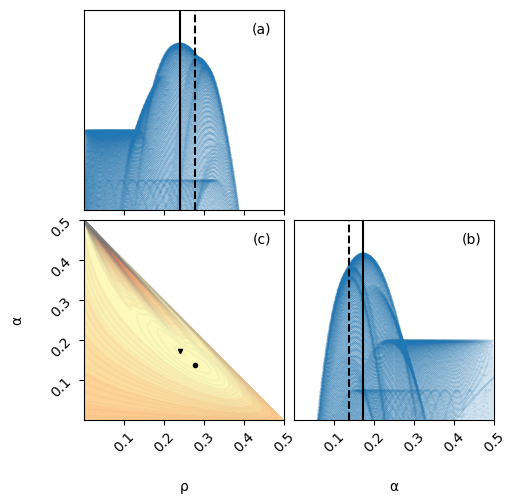

Figure 6. Scenario C: Likelihood estimation for ρ and α with adjustment


In [102]:
# Plot results

# Extract MLE parameter values 
rho_mle = θ_grid_2D_Sm[0]
alpha_mle = θ_grid_2D_Sm[1]

# Define the levels for contour plots
levels = np.linspace(-10000, grid_logs_2D_Sm.max())
levels_line = 100

# Scatter plot parameters
scatter_kwargs = {"marker": ".", "markersize": 0.5, "alpha": 0.2}
hist_kwargs = {"histtype": "step", "color": "k", "linestyle": "--"}

# Create a corner plot
figure = corner.corner(
    np.vstack([grid_2D[1].ravel(), grid_2D[0].ravel()]).T,
    labels=["ρ", "α"],
    range=[(grid_2D[1].min(), grid_2D[1].max()), (grid_2D[0].min(), grid_2D[0].max())],
    plot_datapoints=False,
    plot_density=False,
)

# Reshape the axes array to plot on the diagonal
axes = np.array(figure.axes).reshape((2, 2))

# Randomly sample indices for plotting
# idx = np.random.choice(1000**2, 1000**3//50)

# (a) Scatter plot for rho
axes[0, 0].plot(grid_2D[1].ravel(), grid_logs_2D_Sm.ravel(), **scatter_kwargs)
axes[0, 0].axvline(rho_mle, color='k', ls='-')
axes[0, 0].axvline(θ_grid_2D_St[0], color='k', ls='--') # MLE rho value scenario A
axes[0, 0].set_ylim(grid_logs_2D_Sm.max() - 50, grid_logs_2D_Sm.max() + 10)
axes[0, 0].set_xlim(0, 0.5)
axes[0, 0].plot(0, 0, 'or', alpha=0, label="(a)")
axes[0, 0].legend(frameon=False)

# (b) Scatter plot for alpha
axes[1, 1].plot(grid_2D[0].ravel(), grid_logs_2D_Sm.ravel(), **scatter_kwargs)
axes[1, 1].axvline(alpha_mle, color='k', ls='-')
axes[1, 1].axvline(θ_grid_2D_St[1], color='k', ls='--') # MLE alpha value scenario A
axes[1, 1].set_ylim(grid_logs_2D_Sm.max() - 50, grid_logs_2D_Sm.max() + 10)
axes[1, 1].set_xlim(0, 0.5)
axes[1, 1].plot(0, 0, 'or', alpha=0, label="(b)")
axes[1, 1].legend(frameon=False)

# Contour plots off-diagonal

# (c) Contour plot for rho vs alpha
axes[1, 0].contourf(ρs, αs, grid_logs_2D_Sm[:, :].squeeze().T, cmap=cont_color, levels=levels)
axes[1, 0].contour(ρs, αs, grid_logs_2D_Sm[:, :].squeeze().T, colors=line_color, levels=levels_line, linestyles='solid', alpha=0.05)
axes[1, 0].plot(θ_grid_2D_Sm[0], θ_grid_2D_Sm[1], 'vk', markersize=3)
axes[1, 0].plot(θ_grid_2D_St[0], θ_grid_2D_St[1], 'ok', markersize=3) # MLE rho vs alpha values scenario A
axes[1, 0].set(xlim=(0, 0.5), ylim=(0, 0.5))
axes[1, 0].plot(0, 0, 'or', alpha=0, label="(c)")
axes[1, 0].legend(frameon=False)

# Show the plot
plt.show()

print('Figure 6. Scenario C: Likelihood estimation for ρ and α with adjustment')



### G-test for goodness-of-fit

#### Three parameters

In [73]:
#  G-test for estimated of ρ=0.207, α=0.203, β=0.042 with adjustments

G_all_ScenarioC_3D, p_all_ScenarioC_3D, Delta_overall_ScenarioC_3D, G_each_ScenarioC_3D, p_each_ScenarioC_3D, Delta_each_ScenarioC_3D = Goodness_of_fit(θ = θ_Nelder_Mead_3D_Sm, Observed = D, adjust = True)


G-test for ρ=0.207, α=0.203, β=0.042
df overall =  31  df each =  1.82 

------------------------------
Overall:

G= 36.3,	p_value= 0.234
------------------------------
Each row in dataset:

G= 7.1*,	p_value= 0.024
G= 3.31,	p_value= 0.166
G= 2.77,	p_value= 0.220
G= 4.63,	p_value= 0.084
G= 1.8,	p_value= 0.366
G= 0.48,	p_value= 0.745
G= 0.2,	p_value= 0.878
G= 2.11,	p_value= 0.311
G= 3.59,	p_value= 0.143
G= 0.04,	p_value= 0.973
G= 3.77,	p_value= 0.131
G= 0.63,	p_value= 0.686
G= 0.06,	p_value= 0.960
G= 2.33,	p_value= 0.276
G= 0.83,	p_value= 0.616
G= 0.01,	p_value= 0.993
G= 2.68,	p_value= 0.230
------------------------------


In [74]:
# Plot Table 9. Scenario C: Results of goodness-of-fit test with adjustment for estimates with adjustment (ρ = 0.207, α = 0.203, β = 0.042).

G_test_ScenarioC_3D = results_table(θ = θ_Nelder_Mead_3D_Sm, Observed = D, G_each = G_each_ScenarioC_3D, adjust= False, delta= False)

print('\n Table 9. Scenario C: Results of goodness-of-fit test with adjustment for estimates with adjustment (ρ = 0.207, α = 0.203, β = 0.042).')
G_test_ScenarioC_3D



 Table 9. Scenario C: Results of goodness-of-fit test with adjustment for estimates with adjustment (ρ = 0.207, α = 0.203, β = 0.042).


RxR                       RxL  \
                                         R            L            R   
Ramaley (1913)                 841 (870.0)   115 (86.0)  113 (125.1)   
Chamberlain (1928)           6917 (6574.7)  308 (650.3)  411 (347.5)   
Rife (1940)                  1842 (1813.6)  151 (179.4)  140 (130.3)   
Merrell (1957)                 140 (158.3)    34 (15.7)    33 (39.7)   
Annett (1973)                6206 (6256.2)  669 (618.8)  471 (446.4)   
Ferronato et al. (1947)        154 (150.1)    11 (14.9)    31 (30.0)   
Mascie-Taylor (unpub)          232 (226.6)    17 (22.4)    41 (36.0)   
Chaurasia & Goswani (unpub)  1060 (1095.6)  144 (108.4)  122 (125.8)   
Annett (1978)                1656 (1625.3)  130 (160.7)  170 (157.3)   
Carter-Saltzmann (1980)        303 (309.4)    37 (30.6)    45 (44.9)   
Coren & Porac (1980)           315 (348.5)    68 (34.5)    57 (54.7)   
McGee & Cozad (1980)           848 (963.7)   211 (95.3)  325 (355.8)   
McManus (1985) (ICM1)            58 (61.0)      9 (6.0)    14 (14.2)   
McManus (1985) (ICM2prop)      134 (135.6)    15 (13.4)    17 (19.5)   
McManus (1985) (ICM2mat)         74 (71.0)      4 (7.0)      6 (6.0)   
McManus (1985) (ICM2pat)         86 (81.9)      4 (8.1)      8 (6.7)   
Leiber & Axelrod (1981)      1729 (1730.8)  173 (171.2)  281 (257.7)   

                                                LxL                G  
                                       L          R          L        
Ramaley (1913)                 54 (41.9)    1 (4.0)    7 (4.0)  7.10  
Chamberlain (1928)            53 (116.5)  18 (12.6)   7 (12.4)  3.31  
Rife (1940)                    34 (43.7)    5 (5.5)    6 (5.5)  2.77  
Merrell (1957)                 20 (13.3)    8 (5.0)    2 (5.0)  4.63  
Annett (1973)                125 (149.6)    5 (3.0)    1 (3.0)  1.80  
Ferronato et al. (1947)         9 (10.0)    0 (0.0)    0 (0.0)  0.48  
Mascie-Taylor (unpub)           7 (12.0)    3 (2.0)    1 (2.0)  0.20  
Chaurasia & Goswani (unpub)    46 (42.2)    3 (3.5)    4 (3.5)  2.11  
Annett (1978)                  40 (52.7)    4 (2.0)    0 (2.0)  3.59  
Carter-Saltzmann (1980)        15 (15.1)    0 (0.0)    0 (0.0)  0.04  
Coren & Porac (1980)           16 (18.3)    0 (0.0)    0 (0.0)  3.77  
McGee & Cozad (1980)         150 (119.2)  30 (26.2)  22 (25.8)  0.63  
McManus (1985) (ICM1)            5 (4.8)    0 (0.0)    0 (0.0)  0.06  
McManus (1985) (ICM2prop)        9 (6.5)    1 (0.5)    0 (0.5)  2.33  
McManus (1985) (ICM2mat)         2 (2.0)    0 (0.0)    0 (0.0)  0.83  
McManus (1985) (ICM2pat)         1 (2.3)    0 (0.0)    0 (0.0)  0.01  
Leiber & Axelrod (1981)        63 (86.3)    8 (5.5)    3 (5.5)  2.68

In [75]:
# Summarize differences

df = pd.DataFrame(
    {
        'Laland G value': G_1995_each,
        'My G value': G_each_ScenarioC_3D,
        'Difference': Delta_each_ScenarioC_3D
    },
    index=Laland_index
)

# Values for the Total row
Total_row = pd.DataFrame(
    {
        'Laland G value': [G_1995_overall],
        'My G value': [G_all_ScenarioC_3D],
        'Difference': [G_all_ScenarioC_3D - G_1995_overall]
    },
    index=['Total']
)

# Concatenate the new row to the original DataFrame
df = pd.concat([df, Total_row])

# Function to highlight min, max, and total row values in the 'Difference' column
def highlight_min_max_total(s):
    is_total = s.index == 'Total'
    non_total_values = abs(s[~is_total])
    is_min = non_total_values == non_total_values.min()
    is_max = non_total_values == non_total_values.max()
    return ['background-color: lightblue' if is_total[i] else 'background-color: lightcoral' if is_min.iloc[i] else 'background-color: lightgreen' if is_max.iloc[i] else '' for i in range(len(s))]

styled_df = df.style.apply(highlight_min_max_total, subset=['Difference'])

# Display the styled DataFrame
print("Biggest difference (in green) =", abs(Delta_each_ScenarioC_3D).max())
print("Smallest differenc (in red) =", abs(Delta_each_ScenarioC_3D).min())
print('Difference overall (in blue)=', Delta_overall_ScenarioC_3D)
styled_df


Biggest difference (in green) = 6.09
Smallest differenc (in red) = 0.0
Difference overall (in blue)= 8.1


,Laland G value,My G value,Difference
Ramaley (1913),13.190000,7.100000,6.090000
Chamberlain (1928),5.090000,3.310000,1.780000
Rife (1940),4.370000,2.770000,1.600000
Merrell (1957),3.330000,4.630000,-1.300000
Annett (1973),0.900000,1.800000,-0.900000
Ferronato et al. (1947),0.540000,0.480000,0.060000
Mascie-Taylor (unpub),0.110000,0.200000,-0.090000
Chaurasia & Goswani (unpub),2.270000,2.110000,0.160000
Annett (1978),3.260000,3.590000,-0.330000
Carter-Saltzmann (1980),0.060000,0.040000,0.020000


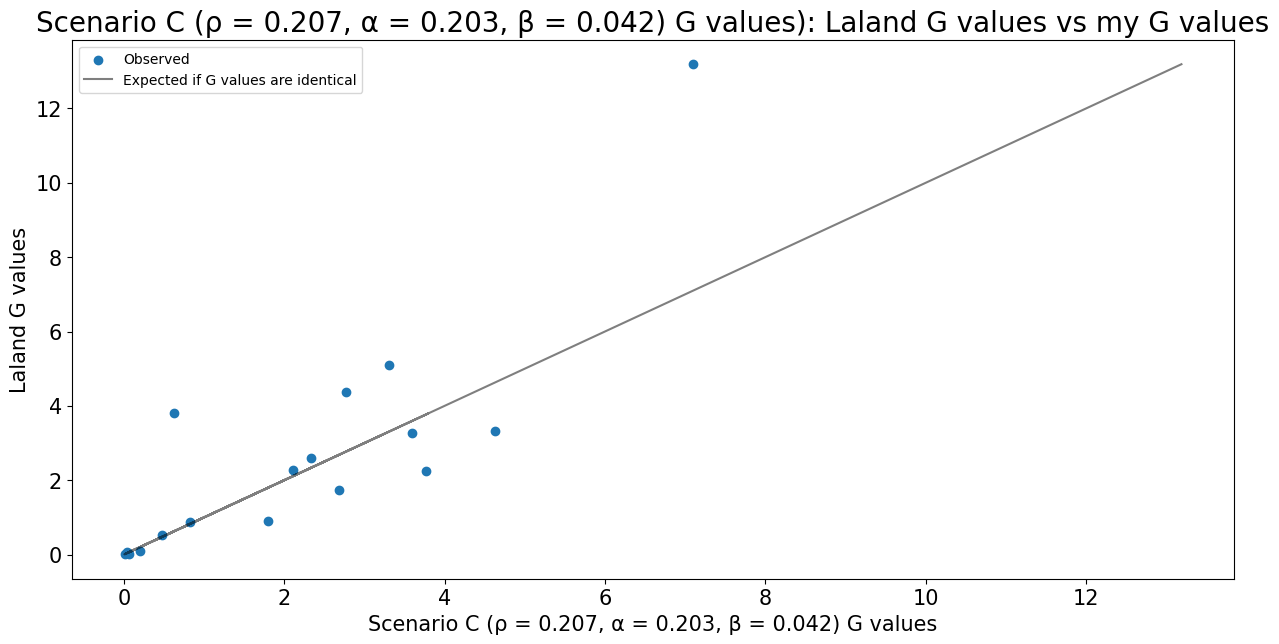

In [76]:
# Visualize Laland G values vs ScenarioC_3D G values

fig, axes = plt.subplots(1, 1, figsize=(15,7))


plt.scatter(x = G_test_ScenarioC_3D['G'], y = G_1995_each, label = 'Observed')

# Add x=y line
plt.plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

# Add labels, title, legend, etc.
plt.xlabel('Scenario C (ρ = 0.207, α = 0.203, β = 0.042) G values', fontsize = font_size_)
plt.ylabel('Laland G values', fontsize = font_size_)
plt.tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
plt.title('Scenario C (ρ = 0.207, α = 0.203, β = 0.042) G values): Laland G values vs my G values', fontsize = font_size_ + 5)
plt.legend()

# Show the plot
plt.show()

#### Two parameters

In [77]:
#  G-test for estimated of ρ=0.239, α=0.172 with adjustments

G_all_ScenarioC_2D, p_all_ScenarioC_2D, Delta_overall_ScenarioC_2D, G_each_ScenarioC_2D, p_each_ScenarioC_2D, Delta_each_ScenarioC_2D = Goodness_of_fit(θ = θ_Nelder_Mead_2D_Sm, Observed = D, adjust = True)



G-test for ρ=0.239, α=0.172, β=0.000
df overall =  32  df each =  1.88 

------------------------------
Overall:

G= 37.5,	p_value= 0.231
------------------------------
Each row in dataset:

G= 8.29*,	p_value= 0.014
G= 4.22,	p_value= 0.109
G= 3.79,	p_value= 0.137
G= 3.55,	p_value= 0.154
G= 1.35,	p_value= 0.481
G= 0.4,	p_value= 0.796
G= 0.19,	p_value= 0.891
G= 2.65,	p_value= 0.244
G= 3.04,	p_value= 0.201
G= 0.07,	p_value= 0.957
G= 4.14,	p_value= 0.114
G= 0.24,	p_value= 0.869
G= 0.09,	p_value= 0.943
G= 1.98,	p_value= 0.346
G= 0.81,	p_value= 0.636
G= 0.01,	p_value= 0.995
G= 2.69,	p_value= 0.239
------------------------------


In [78]:
# Plot Table 10. Scenario C: Results of goodness-of-fit test with adjustment for estimates with adjustment (ρ = 0.239, α = 0.172).

G_test_ScenarioC_2D = results_table(θ = θ_Nelder_Mead_3D_Sm, Observed = D, G_each = G_each_ScenarioC_2D, adjust= False, delta= False)

print('\n Table 10. Scenario C: Results of goodness-of-fit test with adjustment for estimates with adjustment (ρ = 0.239, α = 0.172)')
G_test_ScenarioC_2D



 Table 10. Scenario C: Results of goodness-of-fit test with adjustment for estimates with adjustment (ρ = 0.239, α = 0.172)


RxR                       RxL  \
                                         R            L            R   
Ramaley (1913)                 841 (870.0)   115 (86.0)  113 (125.1)   
Chamberlain (1928)           6917 (6574.7)  308 (650.3)  411 (347.5)   
Rife (1940)                  1842 (1813.6)  151 (179.4)  140 (130.3)   
Merrell (1957)                 140 (158.3)    34 (15.7)    33 (39.7)   
Annett (1973)                6206 (6256.2)  669 (618.8)  471 (446.4)   
Ferronato et al. (1947)        154 (150.1)    11 (14.9)    31 (30.0)   
Mascie-Taylor (unpub)          232 (226.6)    17 (22.4)    41 (36.0)   
Chaurasia & Goswani (unpub)  1060 (1095.6)  144 (108.4)  122 (125.8)   
Annett (1978)                1656 (1625.3)  130 (160.7)  170 (157.3)   
Carter-Saltzmann (1980)        303 (309.4)    37 (30.6)    45 (44.9)   
Coren & Porac (1980)           315 (348.5)    68 (34.5)    57 (54.7)   
McGee & Cozad (1980)           848 (963.7)   211 (95.3)  325 (355.8)   
McManus (1985) (ICM1)            58 (61.0)      9 (6.0)    14 (14.2)   
McManus (1985) (ICM2prop)      134 (135.6)    15 (13.4)    17 (19.5)   
McManus (1985) (ICM2mat)         74 (71.0)      4 (7.0)      6 (6.0)   
McManus (1985) (ICM2pat)         86 (81.9)      4 (8.1)      8 (6.7)   
Leiber & Axelrod (1981)      1729 (1730.8)  173 (171.2)  281 (257.7)   

                                                LxL                G  
                                       L          R          L        
Ramaley (1913)                 54 (41.9)    1 (4.0)    7 (4.0)  8.29  
Chamberlain (1928)            53 (116.5)  18 (12.6)   7 (12.4)  4.22  
Rife (1940)                    34 (43.7)    5 (5.5)    6 (5.5)  3.79  
Merrell (1957)                 20 (13.3)    8 (5.0)    2 (5.0)  3.55  
Annett (1973)                125 (149.6)    5 (3.0)    1 (3.0)  1.35  
Ferronato et al. (1947)         9 (10.0)    0 (0.0)    0 (0.0)  0.40  
Mascie-Taylor (unpub)           7 (12.0)    3 (2.0)    1 (2.0)  0.19  
Chaurasia & Goswani (unpub)    46 (42.2)    3 (3.5)    4 (3.5)  2.65  
Annett (1978)                  40 (52.7)    4 (2.0)    0 (2.0)  3.04  
Carter-Saltzmann (1980)        15 (15.1)    0 (0.0)    0 (0.0)  0.07  
Coren & Porac (1980)           16 (18.3)    0 (0.0)    0 (0.0)  4.14  
McGee & Cozad (1980)         150 (119.2)  30 (26.2)  22 (25.8)  0.24  
McManus (1985) (ICM1)            5 (4.8)    0 (0.0)    0 (0.0)  0.09  
McManus (1985) (ICM2prop)        9 (6.5)    1 (0.5)    0 (0.5)  1.98  
McManus (1985) (ICM2mat)         2 (2.0)    0 (0.0)    0 (0.0)  0.81  
McManus (1985) (ICM2pat)         1 (2.3)    0 (0.0)    0 (0.0)  0.01  
Leiber & Axelrod (1981)        63 (86.3)    8 (5.5)    3 (5.5)  2.69

In [79]:
# Summarize differences

df = pd.DataFrame(
    {
        'Laland G value': G_1995_each,
        'My G value': G_each_ScenarioC_2D,
        'Difference': Delta_each_ScenarioC_2D
    },
    index=Laland_index
)

# Values for the Total row
Total_row = pd.DataFrame(
    {
        'Laland G value': [G_1995_overall],
        'My G value': [G_all_ScenarioC_2D],
        'Difference': [G_all_ScenarioC_2D - G_1995_overall]
    },
    index=['Total']
)

# Concatenate the new row to the original DataFrame
df = pd.concat([df, Total_row])

# Function to highlight min, max, and total row values in the 'Difference' column
def highlight_min_max_total(s):
    is_total = s.index == 'Total'
    non_total_values = abs(s[~is_total])
    is_min = non_total_values == non_total_values.min()
    is_max = non_total_values == non_total_values.max()
    return ['background-color: lightblue' if is_total[i] else 'background-color: lightcoral' if is_min.iloc[i] else 'background-color: lightgreen' if is_max.iloc[i] else '' for i in range(len(s))]

styled_df = df.style.apply(highlight_min_max_total, subset=['Difference'])

# Display the styled DataFrame
print("Biggest difference (in green) =", abs(Delta_each_ScenarioC_2D).max())
print("Smallest differenc (in red) =", abs(Delta_each_ScenarioC_2D).min())
print('Difference overall (in blue)=', Delta_overall_ScenarioC_2D)
styled_df


Biggest difference (in green) = 4.9
Smallest differenc (in red) = 0.0
Difference overall (in blue)= 6.93


,Laland G value,My G value,Difference
Ramaley (1913),13.190000,8.290000,4.900000
Chamberlain (1928),5.090000,4.220000,0.870000
Rife (1940),4.370000,3.790000,0.580000
Merrell (1957),3.330000,3.550000,-0.220000
Annett (1973),0.900000,1.350000,-0.450000
Ferronato et al. (1947),0.540000,0.400000,0.140000
Mascie-Taylor (unpub),0.110000,0.190000,-0.080000
Chaurasia & Goswani (unpub),2.270000,2.650000,-0.380000
Annett (1978),3.260000,3.040000,0.220000
Carter-Saltzmann (1980),0.060000,0.070000,-0.010000


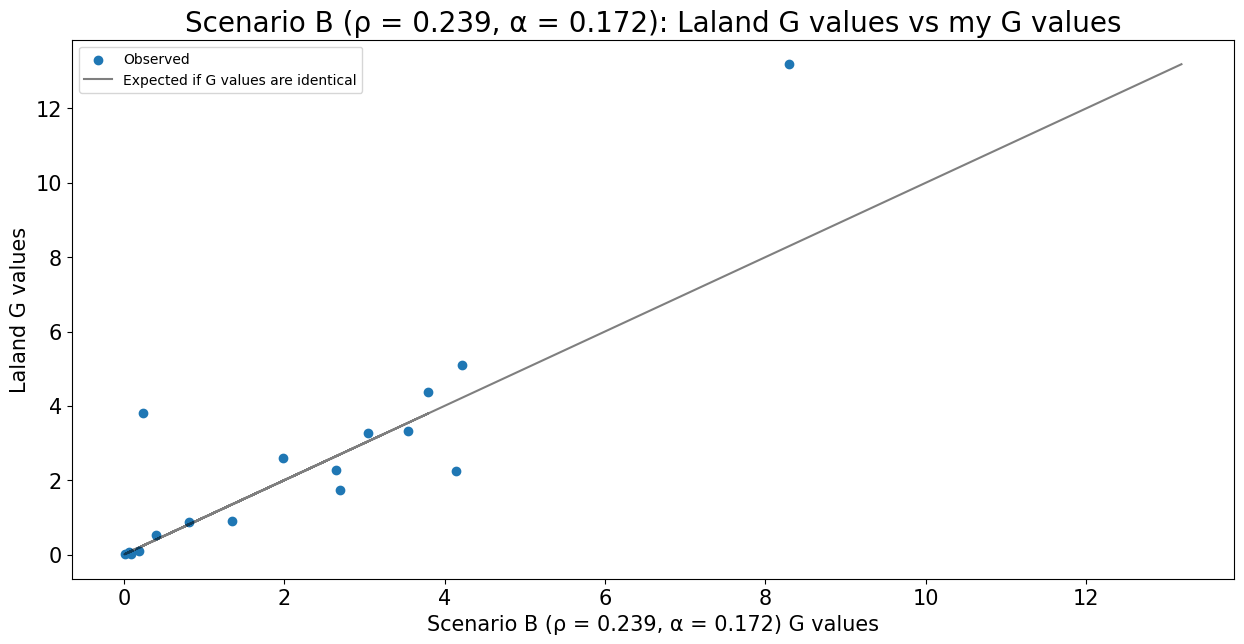

In [80]:
# Visualize Laland G values vs ScenarioC_2D G values

fig, axes = plt.subplots(1, 1, figsize=(15,7))

plt.scatter(x = G_test_ScenarioC_2D['G'], y = G_1995_each, label = 'Observed')

# Add x=y line
plt.plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

# Add labels, title, legend, etc.
plt.xlabel('Scenario B (ρ = 0.239, α = 0.172) G values', fontsize = font_size_)
plt.ylabel('Laland G values', fontsize = font_size_)
plt.tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
plt.title('Scenario B (ρ = 0.239, α = 0.172): Laland G values vs my G values', fontsize = font_size_ + 5)
plt.legend()

# Show the plot
plt.show()

## Summary of Results

### (a) Results of maximum likelihood estimation

In [60]:

# Result of sLaland et al (1995)
#                     rho     alpha   beta   Max.log-like  F_DL      G_overall    # studies with good fit
Laland_3D = np.array([0.267,  0.148,  0.012, '-'          ,'-'      , '-' ,        '-'])
Laland_2D = np.array([0.277,  0.138,  0    , '-'          ,'11.74%' , 44.3,         16])

# Results of my analysis
#                         rho                      alpha                    beta                    Max.log-like                             F_DL                                                    G_overall                # studies with good fit
scenario_A_3D = np.array([θ_Nelder_Mead_3D_St[0],  θ_Nelder_Mead_3D_St[1],  θ_Nelder_Mead_3D_St[2], "{:.3f}".format(Nelder_Mead_logL_3D_St), "{:.2f}%".format(compute_t(*θ_Nelder_Mead_3D_St)*100)  ,G_all_ScenarioA_3D     , len(p_each_ScenarioA_3D[p_each_ScenarioA_3D > 0.05])])
scenario_A_2D = np.array([θ_Nelder_Mead_2D_St[0],  θ_Nelder_Mead_2D_St[1],  θ_Nelder_Mead_2D_St[2], "{:.3f}".format(Nelder_Mead_logL_2D_St), "{:.2f}%".format(compute_t(*θ_Nelder_Mead_2D_St)*100)  ,G_all_ScenarioA_2D     , len(p_each_ScenarioA_2D[p_each_ScenarioA_2D > 0.05])])

scenario_B_3D = np.array([θ_Nelder_Mead_3D_St[0],  θ_Nelder_Mead_3D_St[1],  θ_Nelder_Mead_3D_St[2], "{:.3f}".format(Nelder_Mead_logL_3D_St), "{:.2f}%".format(compute_t(*θ_Nelder_Mead_3D_St)*100)  ,G_all_ScenarioB_3D     , len(p_each_ScenarioB_3D[p_each_ScenarioB_3D > 0.05])])
scenario_B_2D = np.array([θ_Nelder_Mead_2D_St[0],  θ_Nelder_Mead_2D_St[1],  θ_Nelder_Mead_2D_St[2], "{:.3f}".format(Nelder_Mead_logL_2D_St), "{:.2f}%".format(compute_t(*θ_Nelder_Mead_2D_St)*100)  ,G_all_ScenarioB_2D     , len(p_each_ScenarioB_2D[p_each_ScenarioB_2D > 0.05])])

scenario_C_3D = np.array([θ_Nelder_Mead_3D_Sm[0],  θ_Nelder_Mead_3D_Sm[1],  θ_Nelder_Mead_3D_Sm[2], "{:.3f}".format(Nelder_Mead_logL_3D_Sm), "{:.2f}%".format(compute_t(*θ_Nelder_Mead_3D_Sm)*100)  ,G_all_ScenarioC_3D     , len(p_each_ScenarioC_3D[p_each_ScenarioC_3D > 0.05])])
scenario_C_2D = np.array([θ_Nelder_Mead_2D_Sm[0],  θ_Nelder_Mead_2D_Sm[1],  θ_Nelder_Mead_2D_Sm[2], "{:.3f}".format(Nelder_Mead_logL_2D_Sm), "{:.2f}%".format(compute_t(*θ_Nelder_Mead_2D_Sm)*100)  ,G_all_ScenarioC_2D     , len(p_each_ScenarioC_2D[p_each_ScenarioC_2D > 0.05])])

NameError: name 'G_all_ScenarioB_3D' is not defined

In [61]:

Table11 = pd.DataFrame(
    [Laland_3D,
     Laland_2D,
     scenario_A_3D,
     scenario_A_2D,
     scenario_B_3D,
     scenario_B_2D,
     scenario_C_3D,
     scenario_C_2D],
    index = ['Laland et al., (1995) (ρ, α, β)',
             'Laland et al., (1995) (ρ, α)',
             'Scenario A (ρ, α, β)',
             'Scenario A (ρ, α)',
             'Scenario B (ρ, α, β)',
             'Scenario B (ρ, α)',
             'Scenario C (ρ, α, β)',
             'Scenario C (ρ, α)'],
    columns= ['ρ', 'α', 'β', 'Max. logL', 'F_DL', 'G_overall', '#studies with good fit'])

print('Table 11. Summary of comparison to Laland et al., (1995). (a) Results of maximum likelihood estimation \n')
Table11

Table 11. Summary of comparison to Laland et al., (1995). (a) Results of maximum likelihood estimation 



,ρ,α,β,Max. logL,F_DL,G_overall,#studies with good fit
"Laland et al., (1995) (ρ, α, β)",0.267,0.148,0.012,-,-,-,-
"Laland et al., (1995) (ρ, α)",0.277,0.138,0,-,11.74%,44.3,16
"Scenario A (ρ, α, β)",0.267,0.148,0.012,-8826.643,11.72%,555.73,9
"Scenario A (ρ, α)",0.277,0.138,0.0,-8826.793,11.74%,556.03,9
"Scenario B (ρ, α, β)",0.267,0.148,0.012,-8826.643,11.72%,43.6,16
"Scenario B (ρ, α)",0.277,0.138,0,-8826.793,11.74%,44.4,16
"Scenario C (ρ, α, β)",0.207,0.203,0.042,-8566.939,13.50%,36.3,16
"Scenario C (ρ, α)",0.239,0.172,0,-8567.529,13.56%,37.5,16


### (b) Results of goodness-of-fit test

In [ ]:
Gs_each = np.column_stack((G_1995_each, G_each_ScenarioA_3D, G_each_ScenarioA_2D, G_each_ScenarioB_3D, G_each_ScenarioB_2D, G_each_ScenarioC_3D, G_each_ScenarioC_2D))
Gs_all = [G_1995_overall, G_all_ScenarioA_3D, G_all_ScenarioA_2D, G_all_ScenarioB_3D, G_all_ScenarioB_2D, G_all_ScenarioC_3D, G_all_ScenarioC_2D]

Gs_table = pd.DataFrame(data = Gs_each,
                  index = Laland_index,
                  columns =['Laland 1995', 'Scenario A (ρ, α, β)', 'Scenario A (ρ, α)', 'Scenario B (ρ, α, β)', 'Scenario B (ρ, α)', 'Scenario C (ρ, α, β)', 'Scenario C (ρ, α)'])

Gs_table.loc['Overall'] =  Gs_all

print('Table 11. Summary of comparison to Laland et al., (1995). (b) Results of goodness-of-fit-test')
Gs_table

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].scatter(y = G_1995_each, x = G_each_ScenarioA_3D, label = 'ρ, α, β')
axes[0].scatter(y = G_1995_each, x = G_each_ScenarioA_2D, label = 'ρ, α')
axes[0].plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5, label = 'Expected if G values are identical')

axes[0].set_xlabel('G values Scenario A', fontsize= font_size_)
axes[0].tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
axes[0].set_title('Scenario A', loc='left', size=font_size_)
axes[0].set_ylabel('G values Laland 95', fontsize= font_size_)

axes[1].scatter(y = G_1995_each, x = G_each_ScenarioB_3D )
axes[1].scatter(y = G_1995_each, x = G_each_ScenarioB_2D)
axes[1].plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5)

axes[1].set_xlabel('G values Scenario B', fontsize= font_size_)
axes[1].tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
axes[1].set_title('Scenario B', loc='left', size=font_size_)


axes[2].scatter(y = G_1995_each, x = G_each_ScenarioC_3D)
axes[2].scatter(y = G_1995_each, x = G_each_ScenarioC_2D)
axes[2].plot(G_1995_each, G_1995_each, color = 'k', alpha = 0.5)

axes[2].set_xlabel('G values Scenario C', fontsize= font_size_)
axes[2].tick_params(axis= 'both', which = 'major', labelsize= tick_size_)
axes[2].set_title('Scenario C', loc='left', size=font_size_)

fig.legend(loc='upper center',bbox_to_anchor=(0.5, -0.01), ncol=3, fontsize = font_size_)

fig.suptitle('Laland G values vs My G values', size = font_size_ + 5)
fig.tight_layout()

# F-test

In [85]:
n = 17 # number of samples
p0 = 2 # number of parameters in null model
p1 = 3 # number of parameters in alternative model

F = ((-8826.793 - -8826.643) / (p1 - p0)) / (-8826.643 / (n - p1)) # F-statistic, see https://en.wikipedia.org/wiki/F-test#Regression_problems
pvalue = scipy.stats.f(p1 - p0, n - p1).sf(F) # sf = 1 - cdf
print("F-statistic: {:.2g}".format(F))
print("Likelihood-ratio test p-value = {:.2g}".format(pvalue))
print("The nested model is rejected:", pvalue < 0.05)

F-statistic: 0.00024
Likelihood-ratio test p-value = 0.99
The nested model is rejected: False


# Differences between expected true incidence of left handedness and measured one

In [86]:
def diff_FDL(t, measured):

    diffs = np.array([])

    for i in measured:
        diffs_idx = t - i
        diffs = np.append(arr = diffs, values= diffs_idx)

    return diffs

In [87]:
# Expecter true incidance of left handedness according θ

F_DLs = [
        #   F_DL
            [0.1172],     # Laland_95 ()
            [0.1174],     # Laland_95 ()
            [0.1172],     # MLE without adjustments ()
            [0.1174],     # MLE without adjustments ()
            [0.1350],     # MLE with adjustments ()
            [0.1356]      # MLE with adjustments ()

            ]

F_DLs = np.array(F_DLs)

In [88]:
diffs_mp_table = pd.DataFrame(
    {"11.72%" : diff_FDL(F_DLs[0], mp),
     "11.74%" : diff_FDL(F_DLs[1], mp),
     "13.50%" : diff_FDL(F_DLs[4], mp),
     "13.56%" : diff_FDL(F_DLs[5], mp)},
     index = Laland_index
)

print('Differences between measured incidence of left-handers and predicted true incidence in parent generation')
diffs_mp_table

Differences between measured incidence of left-handers and predicted true incidence in parent generation


,11.72%,11.74%,13.50%,13.56%
Ramaley (1913),0.0369,0.0371,0.0547,0.0553
Chamberlain (1928),0.0816,0.0818,0.0994,0.1000
Rife (1940),0.0648,0.0650,0.0826,0.0832
Merrell (1957),-0.0381,-0.0379,-0.0203,-0.0197
Annett (1973),0.0732,0.0734,0.0910,0.0916
Ferronato et al. (1947),0.0186,0.0188,0.0364,0.0370
Mascie-Taylor (unpub),0.0242,0.0244,0.0420,0.0426
Chaurasia & Goswani (unpub),0.0132,0.0134,0.0310,0.0316
Annett (1978),0.0625,0.0627,0.0803,0.0809
Carter-Saltzmann (1980),0.0412,0.0414,0.0590,0.0596


In [89]:
diffs_mo_table = pd.DataFrame(
    {"11.72%" : diff_FDL(F_DLs[0], mo),
     "11.74%" : diff_FDL(F_DLs[1], mo),
     "13.50%" : diff_FDL(F_DLs[4], mo),
     "13.56%" : diff_FDL(F_DLs[5], mo)},
     index = Laland_index
)

print('Differences between measured incidence of left-handers and predicted true incidence in offspring generation')
diffs_mo_table

Differences between measured incidence of left-handers and predicted true incidence in offspring generation


,11.72%,11.74%,13.50%,13.56%
Ramaley (1913),-0.0384,-0.0382,-0.0206,-0.0200
Chamberlain (1928),0.0695,0.0697,0.0873,0.0879
Rife (1940),0.0295,0.0297,0.0473,0.0479
Merrell (1957),-0.1190,-0.1188,-0.1012,-0.1006
Annett (1973),0.0109,0.0111,0.0287,0.0293
Ferronato et al. (1947),0.0196,0.0198,0.0374,0.0380
Mascie-Taylor (unpub),0.0341,0.0343,0.0519,0.0525
Chaurasia & Goswani (unpub),-0.0235,-0.0233,-0.0057,-0.0051
Annett (1978),0.0322,0.0324,0.0500,0.0506
Carter-Saltzmann (1980),-0.0148,-0.0146,0.0030,0.0036
